### findings
- This dataset was downloaded on January 14, 2025, from Hugging Face: [https://huggingface.co/datasets/librarian-bots/model_cards_with_metadata](https://huggingface.co/datasets/librarian-bots/model_cards_with_metadata).  
- The earliest recorded time is March 2, 2022 ([GitHub documentation](https://github.com/huggingface/hub-docs/blob/main/docs/hub/api.md)), as any card created earlier is documented with this timestamp.  
- Comparing the top 10 authors by download count with the top 10 authors by model count, we observe that some authors specialize in uploading processed datasets.  
- On Hugging Face, if an arXiv link exists in the tags, it is always extracted and included in the tags.  

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import json

data_type = "modelcard" # or "datasetcard"

Parsing Rows:  35%|███▌      | 391915/1108759 [13:47:38<7650:47:00, 38.42s/it]

In [8]:
file_path = "data/"
assert data_type in ["modelcard", "datasetcard"]
if data_type=="modelcard":
    # Choose huggingface model card:
    file_names = [f"train-0000{i}-of-00004.parquet" for i in range(4)]
elif data_type=="datasetcard":
    # Choose huggingface dataset card:
    file_names = [f"train-0000{i}-of-00003.parquet" for i in range(3)]
else:
    raise ValueError("data_type must be 'modelcard' or 'datasetcard'")
dfs = [pd.read_parquet(os.path.join(file_path, file)) for file in file_names]
df = pd.concat(dfs, ignore_index=True)

total_models = len(df)
non_empty_model_cards = df['card'].notna().sum()
created_at_dates = pd.to_datetime(df['createdAt'], errors='coerce')
start_date = created_at_dates.min()
end_date = created_at_dates.max()
last_modiifed_dates = pd.to_datetime(df['last_modified'], errors='coerce')
modified_early_date = last_modiifed_dates.min()
modified_end_date = last_modiifed_dates.max()

stats = {
    "Total Models": int(total_models),
    "Models with Non-Empty Model Card": int(non_empty_model_cards),
    "Start Date (createdAt)": str(start_date.isoformat()),
    "End Date (createdAt)": str(end_date.isoformat()),
    "Last Modified Early Date": str(modified_early_date.isoformat()),
    "Last Modified Last Date": str(modified_end_date.isoformat()),
}
print(json.dumps(stats, indent=4))

{
    "Total Models": 1108759,
    "Models with Non-Empty Model Card": 1108759,
    "Start Date (createdAt)": "2022-03-02T23:29:04+00:00",
    "End Date (createdAt)": "2024-11-13T01:34:12+00:00",
    "Last Modified Early Date": "2012-10-12T00:02:00+00:00",
    "Last Modified Last Date": "2024-11-13T01:34:19+00:00"
}


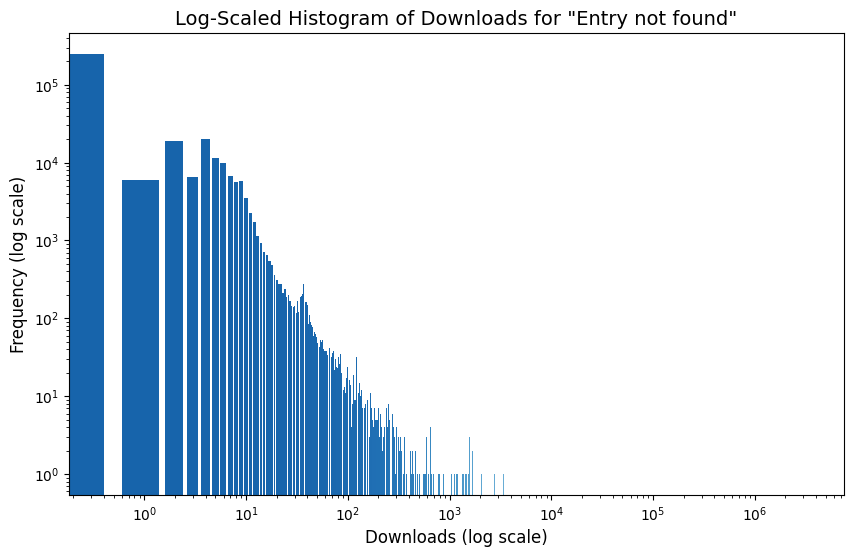

In [11]:
author_downloads = df[df['card'] == 'Entry not found']['downloads'].value_counts().sort_index()

# 绘制直方图（优化颜色渐变）
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.8, 0.4, len(author_downloads)))
plt.bar(author_downloads.index, author_downloads.values, color=colors)

plt.xscale('log')  # 对 x 轴使用 log 缩放
plt.yscale('log')  # 对 y 轴使用 log 缩放
plt.xlabel('Downloads (log scale)', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.title('Log-Scaled Histogram of Downloads for "Entry not found"', fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.grid(False)
plt.show()

In [12]:
"""df['createdAt'] = pd.to_datetime(df['createdAt']).dt.date

# 统计频率
time_distribution = df[df['card'] == 'Entry not found']['createdAt'].value_counts().sort_index()

# 绘制时间分布图（优化颜色渐变）
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.8, 0.4, len(time_distribution)))
plt.bar(time_distribution.index, time_distribution.values, color=colors)

#plt.yscale('log')
plt.xlabel('Date (Year-Month-Day)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Time Distribution of "Entry not found" Cards', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # 调整 x 轴刻度显示
plt.tick_params(axis='both', labelsize=10)
plt.grid(False)
plt.show()"""

'df[\'createdAt\'] = pd.to_datetime(df[\'createdAt\']).dt.date\n\n# 统计频率\ntime_distribution = df[df[\'card\'] == \'Entry not found\'][\'createdAt\'].value_counts().sort_index()\n\n# 绘制时间分布图（优化颜色渐变）\nplt.figure(figsize=(10, 6))\ncolors = plt.cm.Blues(np.linspace(0.8, 0.4, len(time_distribution)))\nplt.bar(time_distribution.index, time_distribution.values, color=colors)\n\n#plt.yscale(\'log\')\nplt.xlabel(\'Date (Year-Month-Day)\', fontsize=12)\nplt.ylabel(\'Frequency\', fontsize=12)\nplt.title(\'Time Distribution of "Entry not found" Cards\', fontsize=14)\nplt.xticks(rotation=45, ha=\'right\', fontsize=10)  # 调整 x 轴刻度显示\nplt.tick_params(axis=\'both\', labelsize=10)\nplt.grid(False)\nplt.show()'

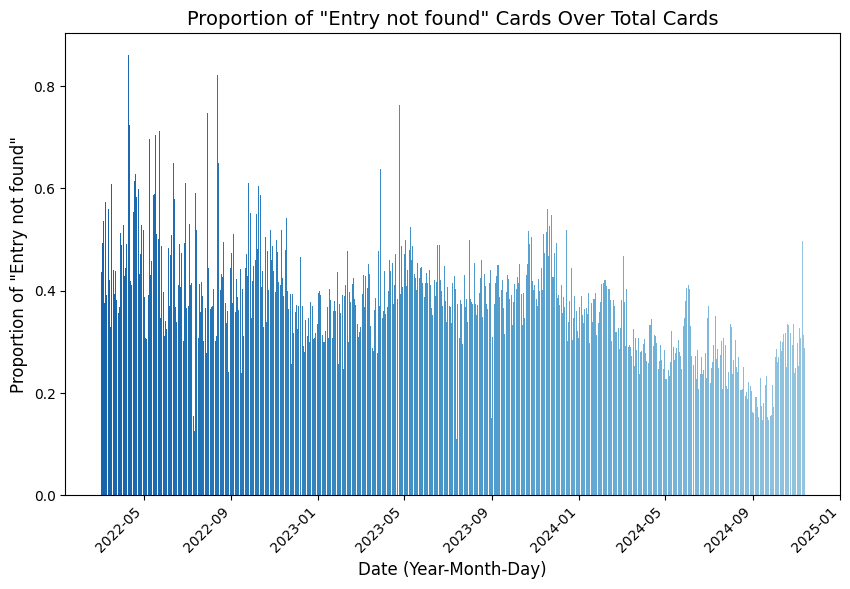

In [4]:
df['createdAt'] = pd.to_datetime(df['createdAt']).dt.date

# 统计每个日期总卡片数量和 'Entry not found' 数量
total_cards_per_date = df.groupby('createdAt').size()
entry_not_found_per_date = df[df['card'] == 'Entry not found'].groupby('createdAt').size()

# 计算归一化比例（占比）
normalized_proportion = (entry_not_found_per_date / total_cards_per_date).fillna(0)

# 绘制时间分布图（优化颜色渐变）
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.8, 0.4, len(normalized_proportion)))
plt.bar(normalized_proportion.index, normalized_proportion.values, color=colors)

plt.xlabel('Date (Year-Month-Day)', fontsize=12)
plt.ylabel('Proportion of "Entry not found"', fontsize=12)
plt.title('Proportion of "Entry not found" Cards Over Total Cards', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # 调整 x 轴刻度显示
plt.tick_params(axis='both', labelsize=10)
plt.grid(False)
plt.show()


### Another type: Invalid username or password.

In [5]:
# Entry not found stands for those model repo with no model cards, either because creating before 2022-03-02 or author just ignore model card editing randomly

# Invalid username or password, stands for repo readme which infringes the items, or this repo is private or disabled
# e.g. https://huggingface.co/RareConcepts/FurkinsWorld-SD35-LoKr
# e.g. https://huggingface.co/skyseven
# e.g. https://huggingface.co/coyotte508/datasets
# Abusive usage of gating (no model) (require user private information)
# https://huggingface.co/Anre3737/dreamgaussian/discussions/2
# malicious code
# https://huggingface.co/star23/baller8
# This repository has been marked as containing sensitive content and may contain potentially harmful and sensitive information.
# https://huggingface.co/CyberHarem/nino_fireemblem
# license-issue: CC BY-NC-SA 4.0
# https://huggingface.co/konohashinobi4/4xAnimesharp/discussions/1
# https://huggingface.co/deepinsight-unofficial/inswapper/discussions/2
# Repository disabled per company Stability AI’s request, infringing content matching their alleged intellectual property were found
# https://huggingface.co/ninjawick/LXDS_x9
# violating our content policy - see https://huggingface.co/content-guidelines

len(df[df['card'].isin(['Invalid username or password.'])]) #'Entry not found', 

48

### Another type: default template, or default tags

In [6]:
import pandas as pd
import re
from tqdm import tqdm
from joblib import Parallel, delayed

# Function to clean up line breaks and whitespace
def clean_content(content):
    if content is None:
        return None
    # Normalize line endings (but keep everything else intact)
    return content.replace('\r\n', '\n').replace('\r', '\n')

# Separate tags and README using split and replace
def separate_tags_and_readme(card_content):
    tags, readme = None, None
    try:
        # Clean up content minimally
        card_content = clean_content(card_content)
        if card_content.startswith("---\n"):
            # Split only on the first two "---\n"
            parts = card_content.split("---\n", 2)
            if len(parts) > 2:
                tags = parts[1]  # Keep tags part intact
                readme = parts[2]  # Keep readme part intact
            else:
                readme = parts[1]  # Handle case where only readme exists
        else:
            readme = card_content  # No tags part, entire content is readme
    except Exception as e:
        print(f"Error parsing content: {e}")
    return tags, readme

# Process to extract tags and README using tqdm and apply
def extract_tags_and_readme_parallel(df, n_jobs=-1):
    # Process a single row
    def process_card(card_content):
        return separate_tags_and_readme(card_content)
    # Use joblib to parallelize the map function
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_card)(content) for content in tqdm(df["card"], desc="Extracting Tags and README")
    )
    # Split the results into separate columns
    df["card_tags"] = [x[0] for x in results]
    df["card_readme"] = [x[1] for x in results]
    return df

# Clean and compare restored content using replace and split
def clean_for_comparison(content):
    if content is None:
        return ""
    return content.replace("\n", "").replace("\r", "").replace("---", "").replace(" ", "").strip()

# Validate parsed content using tqdm
def validate_parsing(df):
    inconsistencies = []
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Validating Parsed Cards"):
        original_card = row["card"]  # Preserve the original structure
        restored_card = ""
        if row["card_tags"] is not None:
            restored_card = f"---\n{row['card_tags']}\n---\n{row['card_readme']}"
        else:
            restored_card = row["card_readme"]
        if original_card.strip() != restored_card.strip():
            inconsistencies.append({
                "original_card": row["card"],
                "restored_card": restored_card,
                "card_tags": row["card_tags"],
                "card_readme": row["card_readme"]
            })
    return pd.DataFrame(inconsistencies)

df_split = extract_tags_and_readme_parallel(df, 4)
inconsistencies_df = validate_parsing(df_split)
print(len(inconsistencies_df))
df_split.to_parquet(f"data/{data_type}_step1_data_split_tags_readme.parquet", index=False)

Validating Parsed Cards: 100%|██████████| 1108759/1108759 [03:03<00:00, 6036.17it/s]


701517


In [2]:
import pandas as pd

#df_split = pd.read_csv("data_split_tags_readme.csv")
data_type = "modelcard"
df_split = pd.read_parquet(f"data/{data_type}_step1_data_split_tags_readme.parquet")
df_split.head()

modelId                 author  \
0  sentence-transformers/all-mpnet-base-v2  sentence-transformers   
1                     nesaorg/benchmark_v0                nesaorg   
2   sentence-transformers/all-MiniLM-L6-v2  sentence-transformers   
3            google-bert/bert-base-uncased            google-bert   
4             FacebookAI/xlm-roberta-large             FacebookAI   

              last_modified  downloads  likes           library_name  \
0 2024-11-05 15:25:48+00:00  391757489    874  sentence-transformers   
1 2024-08-19 18:24:49+00:00   98012579      1                   None   
2 2024-11-01 10:26:30+00:00   74110727   2526  sentence-transformers   
3 2024-02-19 11:06:12+00:00   61569952   1897           transformers   
4 2024-02-19 12:48:30+00:00   57186100    345           transformers   

                                                tags         pipeline_tag  \
0  [sentence-transformers, pytorch, onnx, safeten...  sentence-similarity   
1  [safetensors, model_hub_mixin, pytorch_model_h...                 None   
2  [sentence-transformers, pytorch, tf, rust, onn...  sentence-similarity   
3  [transformers, pytorch, tf, jax, rust, coreml,...            fill-mask   
4  [transformers, pytorch, tf, jax, onnx, safeten...            fill-mask   

                  createdAt  \
0 2022-03-02 23:29:05+00:00   
1 2024-08-13 21:07:37+00:00   
2 2022-03-02 23:29:05+00:00   
3 2022-03-02 23:29:04+00:00   
4 2022-03-02 23:29:04+00:00   

                                                card  \
0  ---\nlanguage: en\nlicense: apache-2.0\nlibrar...   
1  ---\ntags:\n- model_hub_mixin\n- pytorch_model...   
2  ---\nlanguage: en\nlicense: apache-2.0\nlibrar...   
3  ---\nlanguage: en\ntags:\n- exbert\nlicense: a...   
4  ---\ntags:\n- exbert\nlanguage:\n- multilingua...   

                                           card_tags  \
0  language: en\nlicense: apache-2.0\nlibrary_nam...   
1  tags:\n- model_hub_mixin\n- pytorch_model_hub_...   
2  language: en\nlicense: apache-2.0\nlibrary_nam...   
3  language: en\ntags:\n- exbert\nlicense: apache...   
4  tags:\n- exbert\nlanguage:\n- multilingual\n- ...   

                                         card_readme  
0  \n\n# all-mpnet-base-v2\nThis is a [sentence-t...  
1  \nThis model has been pushed to the Hub using ...  
2  \n\n# all-MiniLM-L6-v2\nThis is a [sentence-tr...  
3  \n# BERT base model (uncased)\n\nPretrained mo...  
4  \n# XLM-RoBERTa (large-sized model) \n\nXLM-Ro...

In [29]:
#print(inconsistencies_df[inconsistencies_df['original_card']!='Entry not found'].loc[1]['original_card'])
#print(inconsistencies_df[inconsistencies_df['original_card']!='Entry not found'].loc[1]['restored_card'])
#inconsistencies_df[inconsistencies_df['original_card']!='Entry not found']

### Then parse card_tags to individual tags

In [45]:
# double check
card_value_counts = df_split[(df_split['card_tags'].isna()) & (df_split['card_readme'].isin(['Entry not found', 'None', None]))]['card'].value_counts()
print(card_value_counts)

Entry not found    359571
None                    1
Name: card, dtype: int64


In [25]:
#df_split[df_split['modelId']=='kodonho/Solar-OrcaDPO-Solar-Instruct-SLERP']['card'].iloc[0]

In [17]:
import yaml
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
import re
from joblib import parallel_backend
from ruamel.yaml import YAML

# Initialize the YAML parser
yaml_parser = YAML(typ="safe")

# Function to clean YAML content
def clean_yaml_content(content):
    if content is None:
        return None
    # Replace tabs with spaces and normalize line endings
    content = content.replace('\t', ' ').replace('\r\n', '\n').replace('\r', '\n')
    return content

# Function to parse card_tags dynamically with error handling
def parse_card_tags_dynamic(card_tag, full_card_content=None, model_id=None):
    """
    解析 card_tag 字段的 YAML 内容，返回 (解析字典, 是否出错, 错误信息) 三元组
    """
    if not card_tag:
        return {}, False, None
    card_tag = clean_yaml_content(card_tag)
    try:
        # Parse YAML content using ruamel.yaml
        parsed_data = yaml_parser.load(card_tag.strip())
        # 如果解析结果不是 dict，就返回空 dict
        return parsed_data if isinstance(parsed_data, dict) else {}, False, None
    except Exception as e:
        # Capture error details for labeling
        error_message = f"Error parsing card_tags: {e}"
        print(error_message)
        print(f"Problematic card_tags content:\n{card_tag}")
        if model_id:
            print(f"Model ID: {model_id}")
        if full_card_content:
            print(f"Full card content:\n{full_card_content}")
        return {}, True, error_message  # Return error flag and message

def process_tags_and_combine_dynamic_parallel(df, n_jobs=4):
    """
    直接对整张表 df 进行并行处理，并返回最终包含解析结果的 DataFrame。
    - 新增功能：为 YAML 解析得到的所有字段添加 `card_tag_` 前缀。
    """

    def process_row(row):
        # 1. 解析 YAML
        parsed_tags, has_error, error_message = parse_card_tags_dynamic(
            row.card_tags, 
            full_card_content=row.card, 
            model_id=getattr(row, 'modelId', None)
        )

        # 2. 将所有键值对改为带 `card_tag_` 前缀
        prefixed_tags = {}
        for key, value in parsed_tags.items():
            prefixed_tags[f"card_tag_{key}"] = value

        # 3. 返回 (prefixed_tags, 所有新列名, 是否报错, 报错信息)
        return prefixed_tags, set(prefixed_tags.keys()), has_error, error_message

    total_rows = len(df)

    # 并行处理所有行
    with parallel_backend('loky'):
        results = Parallel(n_jobs=n_jobs)(
            delayed(process_row)(row) 
            for row in tqdm(df.itertuples(), total=total_rows, desc=f"Processing {total_rows} Rows")
        )

    # 分解结果
    parsed_data_list, all_keys_list, error_flags, error_messages = zip(*results)

    # 聚合所有列名
    all_keys = set().union(*all_keys_list)

    # 构建包含所有新字段的 DataFrame
    parsed_results = {
        key: [data.get(key, None) for data in parsed_data_list]
        for key in all_keys
    }

    # 将错误信息加入 DataFrame
    parsed_results['error_flag'] = error_flags
    parsed_results['error_message'] = error_messages

    # 将解析结果转换为 DataFrame
    parsed_df = pd.DataFrame(parsed_results)

    # 将原 DataFrame 与解析结果合并
    combined_df = pd.concat([df.reset_index(drop=True), parsed_df.reset_index(drop=True)], axis=1)
    return combined_df

# =====================
# 示例用法：
df_split_temp = process_tags_and_combine_dynamic_parallel(df_split, n_jobs=6)
print(df_split_temp.head())
# =====================


In [15]:
for i, chunk in enumerate(processed_chunks):
    duplicate_columns = chunk.columns[chunk.columns.duplicated()]
    if len(duplicate_columns) > 0:
        print(f"Chunk {i} has duplicate columns: {duplicate_columns.tolist()}")


Chunk 0 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 1 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 2 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 3 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 4 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 5 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 6 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 7 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 8 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 9 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 10 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 11 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 12 has duplicate columns: ['tags', 'library_name', 'pipeline_tag']
Chunk 13 has duplicate columns: ['tags', 'library_name', 'pip

In [ ]:
import os

def notify_completion():
    os.system('osascript -e \'display notification "Your script has finished!" with title "Script Complete"\'')
notify_completion()

In [1]:
df_split_temp.to_parquet("data/{data_type}_step2_data_split_tags.parquet", index=False)
df_split_temp.info()

NameError: name 'df_split_temp' is not defined

In [81]:
"""# 筛选出所有以 'card_tags' 开头的列
card_tags_columns = [col for col in df_split_temp.columns if col.startswith('card_tags')]

# 提取这些列的数据并逐列打印
for col in card_tags_columns:
    print(f"{col}: {df_split_temp[col].iloc[2]}")
    print('-')
"""

'# 筛选出所有以 \'card_tags\' 开头的列\ncard_tags_columns = [col for col in df_split_temp.columns if col.startswith(\'card_tags\')]\n\n# 提取这些列的数据并逐列打印\nfor col in card_tags_columns:\n    print(f"{col}: {df_split_temp[col].iloc[2]}")\n    print(\'-\')\n'

In [93]:
# check the values from given value list
valid_licenses = [
    "afl-3.0", "agpl-3.0", "apache-2.0", "apple-ascl", "artistic-2.0",
    "bigcode-openrail-m", "bigscience-bloom-rail-1.0", "bigscience-openrail-m",
    "bsd", "bsd-2-clause", "bsd-3-clause", "bsd-3-clause-clear", "bsl-1.0",
    "c-uda", "cc", "cc-by-2.0", "cc-by-2.5", "cc-by-3.0", "cc-by-4.0",
    "cc-by-nc-2.0", "cc-by-nc-3.0", "cc-by-nc-4.0", "cc-by-nc-nd-3.0",
    "cc-by-nc-nd-4.0", "cc-by-nc-sa-2.0", "cc-by-nc-sa-3.0", "cc-by-nc-sa-4.0",
    "cc-by-nd-4.0", "cc-by-sa-3.0", "cc-by-sa-4.0", "cc0-1.0",
    "cdla-permissive-1.0", "cdla-permissive-2.0", "cdla-sharing-1.0",
    "creativeml-openrail-m", "deepfloyd-if-license", "ecl-2.0", "epl-1.0",
    "epl-2.0", "etalab-2.0", "eupl-1.1", "gemma", "gfdl", "gpl", "gpl-2.0",
    "gpl-3.0", "intel-research", "isc", "lgpl", "lgpl-2.1", "lgpl-3.0",
    "lgpl-lr", "llama2", "llama3", "llama3.1", "llama3.2", "lppl-1.3c",
    "mit", "mpl-2.0", "ms-pl", "ncsa", "odbl", "odc-by", "ofl-1.1",
    "openrail", "openrail++", "osl-3.0", "other", "pddl", "postgresql",
    "unknown", "unlicense", "wtfpl", "zlib"
]

df_split_temp['is_valid_license'] = df_split_temp['card_tags_license'].apply(
    lambda licenses: all(
        license.split('#')[0].replace(' ', '').replace('"', '').replace("'", "") in valid_licenses
        for license in licenses
    ) if isinstance(licenses, list) else False
)
# 输出不合法的 license 行
invalid_licenses_df = df_split_temp[~df_split_temp['is_valid_license']]

In [128]:
valid_licenses_lower = [i.lower() for i in valid_licenses]

def clean_and_validate(row):
    if not isinstance(row, str):
        return False
    # Remove comments starting with #
    row = row.split('#')[0].strip().lower()
    # Clean up brackets and quotes
    cleaned = row.replace("[", "").replace("]", "").replace("'", "").replace('"', "").strip()
    # Split by comma and strip each tag
    tags = [tag.strip() for tag in cleaned.split(",") if tag.strip()]
    return all(tag in valid_licenses_lower for tag in tags)

df_split_temp['all_valid'] = df_split_temp['card_tags_license'].apply(clean_and_validate)

non_default_values = df_split_temp[~df_split_temp['all_valid']]

print(f"不属于 valid_licenses 的记录数量: {len(non_default_values)}")
non_default_values['card_tags_license'].value_counts()

不属于 valid_licenses 的记录数量: 742332


apache-2.0, monolingual, 10K<n<100K, original                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [131]:
# 打印符合条件的行的全部内容
selected_rows = df_split_temp[
    df_split_temp['card_tags_license_cleaned'].isin([
        'other, License Rights and Redistribution., Subject to your compliance with this Agreement and the Documentation, Stability AI grants you a non-exclusive, worldwide, non-transferable, non-sublicensable, revocable, royalty free and limited license under Stability AI’s intellectual property or other rights owned by Stability AI embodied in the Software Products to reproduce, distribute, and create derivative works of the Software Products for purposes other than commercial or production use., You will not, and will not permit, assist or cause any third party to use, modify, copy, reproduce, create derivative works of, or distribute the Software Products (or any derivative works thereof, works incorporating the Software Products, or any data produced by the Software), in whole or in part, for any commercial or production purposes., If you distribute or make the Software Products, or any derivative works thereof, available to a third party, you shall (i) provide a copy of this Agreement to such third party, and (ii) retain the following attribution notice within a Notice text file distributed as a part of such copies: Japanese StableLM is licensed under the Japanese StableLM Research License, Copyright (c) Stability AI Ltd. All Rights Reserved.”, The licenses granted to you under this Agreement are conditioned upon your compliance with the Documentation and this Agreement, including the Acceptable Use Policy below and as may be updated from time to time in the future on stability.ai, which is hereby incorporated by reference into this Agreement., Disclaimer of Warranty. UNLESS REQUIRED BY APPLICABLE LAW, THE SOFTWARE PRODUCTS  AND ANY OUTPUT AND RESULTS THEREFROM ARE PROVIDED ON AN AS IS BASIS, WITHOUT WARRANTIES OF ANY KIND, EITHER EXPRESS OR IMPLIED, INCLUDING, WITHOUT LIMITATION, ANY WARRANTIES OF TITLE, NON-INFRINGEMENT, MERCHANTABILITY, OR FITNESS FOR A PARTICULAR PURPOSE. YOU ARE SOLELY RESPONSIBLE FOR DETERMINING THE APPROPRIATENESS OF USING OR REDISTRIBUTING THE SOFTWARE PRODUCTS AND ASSUME ANY RISKS ASSOCIATED WITH YOUR USE OF THE SOFTWARE PRODUCTS AND ANY OUTPUT AND RESULTS., Limitation of Liability. IN NO EVENT WILL STABILITY AI OR ITS AFFILIATES BE LIABLE UNDER ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, TORT, NEGLIGENCE, PRODUCTS LIABILITY, OR OTHERWISE, ARISING OUT OF THIS AGREEMENT, FOR ANY LOST PROFITS OR ANY INDIRECT, SPECIAL, CONSEQUENTIAL, INCIDENTAL, EXEMPLARY OR PUNITIVE DAMAGES, EVEN IF STABILITY AI OR ITS AFFILIATES HAVE BEEN ADVISED OF THE POSSIBILITY OF ANY OF THE FOREGOING., Intellectual Property., No trademark licenses are granted under this Agreement, and in connection with the Software Products, neither Stability AI nor Licensee may use any name or mark owned by or associated with the other or any of its affiliates, except as required for reasonable and customary use in describing and redistributing the Software Products., Subject to Stability AI’s ownership of the Software Products and derivatives made by or for Stability AI, with respect to any derivative works and modifications of the Software Products that are made by you, as between you and Stability AI, you are and will be the owner of such derivative works and modifications., If you institute litigation or other proceedings against Stability AI (including a cross-claim or counterclaim in a lawsuit) alleging that the Software Products or associated outputs or results, or any portion of any of the foregoing, constitutes infringement of intellectual property or other rights owned or licensable by you, then any licenses granted to you under this Agreement shall terminate as of the date such litigation or claim is filed or instituted. You will indemnify and hold harmless Stability AI from and against any claim by any third party arising out of or related to your use or distribution of the Software Products in violation of this Agreement., Term and Termination. The term of this Agreement will commence upon your acceptance of this Agreement or access to the Software Products and will continue in full force and effect until terminated in accordance with the terms and conditions herein. Stability AI may terminate this Agreement if you are in breach of any term or condition of this Agreement. Upon termination of this Agreement, you shall delete and cease use of the Software Products. Sections 2-4 shall survive the termination of this Agreement.', 'other, Yes, No'
    ])
]

# 打印选中的行
print(selected_rows['card'].to_string(index=False))


---\nlanguage:\n- ja\ntags:\n- japanese-stablel...
---\nlanguage:\n- ja\ntags:\n- instructblip\n- ...
---\nlanguage:\n- ja\ntags:\n- japanese-stablel...
---\nlanguage:\n- ja\ntags:\n- japanese-stablel...


In [136]:
print(selected_rows.iloc[3]['card'])

---
language:
- ja
tags:
- japanese-stablelm
- causal-lm
pipeline_tag: text-generation
datasets:
- wikipedia
- CulturaX
license:
- other
extra_gated_prompt: >-
  By clicking "Agree", you agree to the [License Agreement](https://huggingface.co/stabilityai/japanese-stablelm-2-base-1_6b/blob/main/LICENSE.txt) and acknowledge Stability AI's [Privacy Policy](https://stability.ai/privacy-policy).
extra_gated_fields:
  Name: text
  Email: text
  Country: country
  Organization or Affiliation: text
  Receive email updates and promotions on Stability AI products, services, and research?:
    type: select
    options: 
      - Yes
      - No
---

# Japanese Stable LM 2 Base 1.6B

![A beautiful anime-like hummingbird flying with the text "Japanese Stable LM 2" below it, with a lofi anime landscape of Mount Fuji forming the outline of the text "Japanese Stable LM 2"](./japanese-stablelm-bird.png)

> A beautiful anime-like hummingbird flying with the text "Japanese Stable LM 2" below it, with a lof

### save

In [70]:
# 将所有列中为列表的数据转换为字符串
for col in df_split_temp.columns:
    if df_split_temp[col].apply(lambda x: isinstance(x, list)).any():
        df_split_temp[col] = df_split_temp[col].apply(lambda x: ", ".join(map(str, x)) if isinstance(x, list) else x)

# 保存为 Parquet 文件
df_split_temp.to_parquet("data/{data_type}_step2_data_split_tags.parquet", index=False)


In [2]:
import pandas as pd

# 加载 Parquet 文件
df_split_temp_loaded = pd.read_parquet("data/{data_type}_step2_data_split_tags.parquet")

# 如果某些列需要还原为列表类型
columns_to_restore = [
    "card_tags_license",  # 示例列名
    "card_tags_language",  # 示例列名
    "card_tags_tags"  # 示例列名
]

# 将逗号分隔的字符串还原为列表
for col in columns_to_restore:
    if col in df_split_temp_loaded.columns:
        df_split_temp_loaded[col] = df_split_temp_loaded[col].apply(
            lambda x: x.split(", ") if isinstance(x, str) and x else []
        )


In [3]:
df_split_temp = df_split_temp_loaded

In [4]:
df_split_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108759 entries, 0 to 1108758
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   modelId                 1108759 non-null  object             
 1   author                  1108759 non-null  object             
 2   last_modified           1108759 non-null  datetime64[ns, UTC]
 3   downloads               1108759 non-null  int64              
 4   likes                   1108759 non-null  int64              
 5   library_name            671657 non-null   object             
 6   tags                    1108759 non-null  object             
 7   pipeline_tag            485582 non-null   object             
 8   createdAt               1108759 non-null  object             
 9   card                    1108759 non-null  object             
 10  card_tags               682290 non-null   object             
 11  card_readme

### check default template

In [15]:
import re
from joblib import Parallel, delayed

# 提取默认模板的关键句
DEFAULT_TEMPLATE = """
---
# For reference on model card metadata, see the spec: https://github.com/huggingface/hub-docs/blob/main/modelcard.md?plain=1
# Doc / guide: https://huggingface.co/docs/hub/model-cards
{{ card_data }}
---

# Model Card for {{ model_id | default("Model ID", true) }}

<!-- Provide a quick summary of what the model is/does. -->

{{ model_summary | default("", true) }}

## Model Details

### Model Description

<!-- Provide a longer summary of what this model is. -->

{{ model_description | default("", true) }}

- **Developed by:** {{ developers | default("[More Information Needed]", true)}}
- **Funded by [optional]:** {{ funded_by | default("[More Information Needed]", true)}}
- **Shared by [optional]:** {{ shared_by | default("[More Information Needed]", true)}}
- **Model type:** {{ model_type | default("[More Information Needed]", true)}}
- **Language(s) (NLP):** {{ language | default("[More Information Needed]", true)}}
- **License:** {{ license | default("[More Information Needed]", true)}}
- **Finetuned from model [optional]:** {{ base_model | default("[More Information Needed]", true)}}

### Model Sources [optional]

<!-- Provide the basic links for the model. -->

- **Repository:** {{ repo | default("[More Information Needed]", true)}}
- **Paper [optional]:** {{ paper | default("[More Information Needed]", true)}}
- **Demo [optional]:** {{ demo | default("[More Information Needed]", true)}}

## Uses

<!-- Address questions around how the model is intended to be used, including the foreseeable users of the model and those affected by the model. -->

### Direct Use

<!-- This section is for the model use without fine-tuning or plugging into a larger ecosystem/app. -->

{{ direct_use | default("[More Information Needed]", true)}}

### Downstream Use [optional]

<!-- This section is for the model use when fine-tuned for a task, or when plugged into a larger ecosystem/app -->

{{ downstream_use | default("[More Information Needed]", true)}}

### Out-of-Scope Use

<!-- This section addresses misuse, malicious use, and uses that the model will not work well for. -->

{{ out_of_scope_use | default("[More Information Needed]", true)}}

## Bias, Risks, and Limitations

<!-- This section is meant to convey both technical and sociotechnical limitations. -->

{{ bias_risks_limitations | default("[More Information Needed]", true)}}

### Recommendations

<!-- This section is meant to convey recommendations with respect to the bias, risk, and technical limitations. -->

{{ bias_recommendations | default("Users (both direct and downstream) should be made aware of the risks, biases and limitations of the model. More information needed for further recommendations.", true)}}

## How to Get Started with the Model

Use the code below to get started with the model.

{{ get_started_code | default("[More Information Needed]", true)}}

## Training Details

### Training Data

<!-- This should link to a Dataset Card, perhaps with a short stub of information on what the training data is all about as well as documentation related to data pre-processing or additional filtering. -->

{{ training_data | default("[More Information Needed]", true)}}

### Training Procedure

<!-- This relates heavily to the Technical Specifications. Content here should link to that section when it is relevant to the training procedure. -->

#### Preprocessing [optional]

{{ preprocessing | default("[More Information Needed]", true)}}


#### Training Hyperparameters

- **Training regime:** {{ training_regime | default("[More Information Needed]", true)}} <!--fp32, fp16 mixed precision, bf16 mixed precision, bf16 non-mixed precision, fp16 non-mixed precision, fp8 mixed precision -->

#### Speeds, Sizes, Times [optional]

<!-- This section provides information about throughput, start/end time, checkpoint size if relevant, etc. -->

{{ speeds_sizes_times | default("[More Information Needed]", true)}}

## Evaluation

<!-- This section describes the evaluation protocols and provides the results. -->

### Testing Data, Factors & Metrics

#### Testing Data

<!-- This should link to a Dataset Card if possible. -->

{{ testing_data | default("[More Information Needed]", true)}}

#### Factors

<!-- These are the things the evaluation is disaggregating by, e.g., subpopulations or domains. -->

{{ testing_factors | default("[More Information Needed]", true)}}

#### Metrics

<!-- These are the evaluation metrics being used, ideally with a description of why. -->

{{ testing_metrics | default("[More Information Needed]", true)}}

### Results

{{ results | default("[More Information Needed]", true)}}

#### Summary

{{ results_summary | default("", true) }}

## Model Examination [optional]

<!-- Relevant interpretability work for the model goes here -->

{{ model_examination | default("[More Information Needed]", true)}}

## Environmental Impact

<!-- Total emissions (in grams of CO2eq) and additional considerations, such as electricity usage, go here. Edit the suggested text below accordingly -->

Carbon emissions can be estimated using the [Machine Learning Impact calculator](https://mlco2.github.io/impact#compute) presented in [Lacoste et al. (2019)](https://arxiv.org/abs/1910.09700).

- **Hardware Type:** {{ hardware_type | default("[More Information Needed]", true)}}
- **Hours used:** {{ hours_used | default("[More Information Needed]", true)}}
- **Cloud Provider:** {{ cloud_provider | default("[More Information Needed]", true)}}
- **Compute Region:** {{ cloud_region | default("[More Information Needed]", true)}}
- **Carbon Emitted:** {{ co2_emitted | default("[More Information Needed]", true)}}

## Technical Specifications [optional]

### Model Architecture and Objective

{{ model_specs | default("[More Information Needed]", true)}}

### Compute Infrastructure

{{ compute_infrastructure | default("[More Information Needed]", true)}}

#### Hardware

{{ hardware_requirements | default("[More Information Needed]", true)}}

#### Software

{{ software | default("[More Information Needed]", true)}}

## Citation [optional]

<!-- If there is a paper or blog post introducing the model, the APA and Bibtex information for that should go in this section. -->

**BibTeX:**

{{ citation_bibtex | default("[More Information Needed]", true)}}

**APA:**

{{ citation_apa | default("[More Information Needed]", true)}}

## Glossary [optional]

<!-- If relevant, include terms and calculations in this section that can help readers understand the model or model card. -->

{{ glossary | default("[More Information Needed]", true)}}

## More Information [optional]

{{ more_information | default("[More Information Needed]", true)}}

## Model Card Authors [optional]

{{ model_card_authors | default("[More Information Needed]", true)}}

## Model Card Contact

{{ model_card_contact | default("[More Information Needed]", true)}}
"""
# 提取默认模板中所有 `<!-- -->` 包含的关键语句
default_keywords = [
    keyword.strip() for keyword in re.findall(r"<!--(.*?)-->", DEFAULT_TEMPLATE, re.DOTALL)
]

def normalize_text(text: str) -> str:
    """
    归一化文本：去除多余空白、换行、符号，转为小写。
    """
    if not isinstance(text, str):
        return ""
    return re.sub(r"\s+", " ", text.strip().lower())

def is_default_card(card_content: str) -> bool:
    """
    判断 `card_content` 是否为默认模板：
    如果包含所有 default_keywords，则返回 True，否则 False。
    """
    if not isinstance(card_content, str):
        return False
    
    # 归一化卡片内容
    normalized_card = normalize_text(card_content)
    # 检查是否包含所有默认关键句
    return all(normalize_text(keyword) in normalized_card for keyword in default_keywords)

# 并行处理检查每个 card_readme 是否为默认模板
df_split_temp['is_default_card'] = Parallel(n_jobs=-1)(
    delayed(is_default_card)(row) for row in df_split_temp['card_readme']
)

# 汇总统计结果
default_count = df_split_temp['is_default_card'].sum()
total_count = len(df_split_temp)
non_default_count = total_count - default_count

# 打印结果
print(f"Default cards: {default_count}/{total_count} = {default_count / total_count:.2%}")
print(f"Non-default cards: {non_default_count}/{total_count} = {non_default_count / total_count:.2%}")

# 可选：查看哪些卡片被判定为默认模板
print(df_split_temp[df_split_temp['is_default_card']][['card_readme']])


Default cards: 183356/1108759 = 16.54%
Non-default cards: 925403/1108759 = 83.46%
                                               card_readme
22       # Model Card for Model ID\n\n<!-- Provide a qu...
144      # Model Card for Model ID\n\n<!-- Provide a qu...
199      # Model Card for Model ID\n\n<!-- Provide a qu...
231      # Model Card for Model ID\n\n<!-- Provide a qu...
492      # Model Card for Model ID\n\n<!-- Provide a qu...
...                                                    ...
1108747  # Model Card for Model ID\n\n<!-- Provide a qu...
1108749  # Model Card for Model ID\n\n<!-- Provide a qu...
1108752  # Model Card for Model ID\n\n<!-- Provide a qu...
1108755  # Model Card for Model ID\n\n<!-- Provide a qu...
1108758  # Model Card for Model ID\n\n<!-- Provide a qu...

[183356 rows x 1 columns]


In [20]:
df_tmptmp = df_split_temp[
    (~df_split_temp['is_default_card']) & 
    (~df_split_temp['card_readme'].str.contains("Entry not found", case=False, na=False))
][['modelId','card_readme']]
df_tmptmp.iloc[1]

modelId  \
0                  sentence-transformers/all-mpnet-base-v2   
1                                     nesaorg/benchmark_v0   
2                   sentence-transformers/all-MiniLM-L6-v2   
3                            google-bert/bert-base-uncased   
4                             FacebookAI/xlm-roberta-large   
...                                                    ...   
1108743  growwithdaisy/crrllcrrllxovrtn_styles_20241112...   
1108745          PrParadoxy/q-FrozenLake-v1-4x4-noSlippery   
1108748                                 PrParadoxy/Taxi-v3   
1108750                      benito14/SOIT_Llama3.2_model4   
1108757          mradermacher/Mistral-quiet-star-demo-GGUF   

                                               card_readme  
0        # all-mpnet-base-v2\nThis is a [sentence-trans...  
1        This model has been pushed to the Hub using th...  
2        # all-MiniLM-L6-v2\nThis is a [sentence-transf...  
3        # BERT base model (uncased)\n\nPretrained mode...  
4        # XLM-RoBERTa (large-sized model) \n\nXLM-RoBE...  
...                                                    ...  
1108743  # growwithdaisy/crrllcrrllxovrtn_styles_202411...  
1108745  # **Q-Learning** Agent playing1 **FrozenLake-v...  
1108748  # **Q-Learning** Agent playing1 **Taxi-v3**\n ...  
1108750  # Uploaded  model\n\n- **Developed by:** benit...  
1108757  ## About\n\n<!-- ### quantize_version: 2 -->\n...  

[565483 rows x 2 columns]

In [29]:
print(df_tmptmp[df_tmptmp['modelId']=='Deci/DeciLM-6b']['card_readme'].iloc[0])

# DeciLM 6B

DeciLM 6B is a 5.7 billion parameter decoder-only text generation model. With a context window of 4096 tokens, the highly efficient model uses variable Grouped-Query Attention (GQA) to achieve an optimal balance between performance and computational efficiency. The model's architecture was generated using Deci's proprietary Neural Architecture Search-based technology, AutoNAC. 
## Model Details

### Model Description

Deci developed and publically released the DeciLM 6B large language model, a pretrained, high-efficiency generative text model with 5.7 billion parameters. DeciLM 6B outpaces pretrained models in its class, with a throughput that's up to 15 times that of Llama 2 7B's. DeciLM-6B was further fine-tuned using [LoRA ](https://arxiv.org/pdf/2106.09685.pdf)  for instruction following on a subset of the OpenOrca dataset, creating [DeciLM 6B-Instruct](https://huggingface.co/Deci/DeciLM-6b-instruct) 

- **Developed by:** Deci
- **Model type:** DeciLM is an auto-regres

### TODO: Little issue about the extraction of markdown tables, can not process multiple-lines now

In [40]:
import re
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def detect_and_extract_markdown_table(card_content: str):
    """
    检测并提取 Markdown 表格（支持多行）。
    返回 (是否包含 Markdown 表格, 提取的表格文本)。
    """
    if not isinstance(card_content, str):
        return (False, None)

    # Markdown 表格正则表达式
    markdown_table_pattern = (
        r"(?:\|[^\n]*?\|[\s]*\n)+\|[-:| ]*\|[\s]*\n(?:\|[^\n]*?\|(?:\n|$))+"
    )
    
    # 检测 Markdown 表格
    markdown_match = re.search(markdown_table_pattern, card_content, re.MULTILINE)
    if markdown_match:
        return (True, markdown_match.group(0).strip())

    # 没有表格
    return (False, None)

def process_row(row):
    return detect_and_extract_markdown_table(row)

# 使用 ThreadPoolExecutor 进行并行处理，并结合 tqdm 显示进度条
with ThreadPoolExecutor(max_workers=4) as executor:
    # 使用 tqdm 包装 map 以显示进度条
    results = list(tqdm(executor.map(process_row, df_split_temp['card_readme']), total=len(df_split_temp)))

# 将结果转换为 DataFrame 列
df_split_temp[['contains_markdown_table', 'extracted_markdown_table']] = pd.DataFrame(results, index=df_split_temp.index)

# 打印包含 Markdown 表格的行
markdown_tables_df = df_split_temp[df_split_temp['contains_markdown_table']]
print(f"Cards with Markdown tables: {len(markdown_tables_df)}")
print(markdown_tables_df[['card_readme', 'extracted_markdown_table']])

100%|██████████| 1108759/1108759 [00:05<00:00, 194713.52it/s]


Cards with Markdown tables: 151088
                                               card_readme  \
0        # all-mpnet-base-v2\nThis is a [sentence-trans...   
2        # all-MiniLM-L6-v2\nThis is a [sentence-transf...   
3        # BERT base model (uncased)\n\nPretrained mode...   
5        # Whisper\n\nWhisper is a pre-trained model fo...   
9        # Fine-tuned XLSR-53 large model for speech re...   
...                                                    ...   
1108728  <!-- This model card has been generated automa...   
1108730  <!-- This model card has been generated automa...   
1108739  # grimjim/Llama-3-Oasis-v1-OAS-8B GGUF Quantiz...   
1108742  <!-- This model card has been generated automa...   
1108757  ## About\n\n<!-- ### quantize_version: 2 -->\n...   

                                  extracted_markdown_table  
0        | Dataset                                     ...  
2        | Dataset                                     ...  
3        | Model | #params | Language

In [45]:
151088/1108759

0.136267665020081

In [47]:
markdown_tables_df[['modelId', 'extracted_markdown_table']]

modelId  \
0                  sentence-transformers/all-mpnet-base-v2   
2                   sentence-transformers/all-MiniLM-L6-v2   
3                            google-bert/bert-base-uncased   
5                                  openai/whisper-large-v2   
9            jonatasgrosman/wav2vec2-large-xlsr-53-english   
...                                                    ...   
1108728             touhidulislam/BERTweet_retrain_2020_21   
1108730                       tttx/problem226_model_aug_30   
1108739  featherless-ai-quants/grimjim-Llama-3-Oasis-v1...   
1108742                  tttx/problem301_model_more_aug_30   
1108757          mradermacher/Mistral-quiet-star-demo-GGUF   

                                  extracted_markdown_table  
0        | Dataset                                     ...  
2        | Dataset                                     ...  
3        | Model | #params | Language |\n|-------------...  
5        | Size     | Parameters | English-only        ...  
9        | Reference  | Prediction |\n| ------------- |...  
...                                                    ...  
1108728  | Training Loss | Epoch | Step | Validation Lo...  
1108730  | Training Loss | Epoch | Step | Validation Lo...  
1108739  | Quantization Type | File | Size |\n|--------...  
1108742  | Training Loss | Epoch | Step | Validation Lo...  
1108757  | Link | Type | Size/GB | Notes |\n|:-----|:--...  

[151088 rows x 2 columns]

In [42]:
print(markdown_tables_df[['extracted_markdown_table']].iloc[2]['extracted_markdown_table'])

| Model | #params | Language |
|------------------------|--------------------------------|-------|
| [`bert-base-uncased`](https://huggingface.co/bert-base-uncased) | 110M   | English |


In [44]:
markdown_tables_df['extracted_markdown_table'].value_counts()

| Library | Tokens per Second | Max Memory Usage | BLEU |\n| :----: | :----: | :----: | :----: |\n| Transformers 4.26.1 (with PyTorch 1.13.1) | 147.3 | 2332MB | 27.90 |\n| Marian 1.11.0 (int16) | 330.2 | 5901MB | 27.65 |\n| Marian 1.11.0 (int8) | 355.8 | 4763MB | 27.27 |\n| CTranslate2 3.6.0 (int16) | 596.1 | 660MB | 27.53 |\n| CTranslate2 3.6.0 (int8) | 696.1 | 516MB | 27.65 |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [25]:
#df_tmptmp.iloc[565482]['card_readme']

"## About\n\n<!-- ### quantize_version: 2 -->\n<!-- ### output_tensor_quantised: 1 -->\n<!-- ### convert_type: hf -->\n<!-- ### vocab_type:  -->\n<!-- ### tags:  -->\nstatic quants of https://huggingface.co/liminerity/Mistral-quiet-star-demo\n\n<!-- provided-files -->\nweighted/imatrix quants seem not to be available (by me) at this time. If they do not show up a week or so after the static ones, I have probably not planned for them. Feel free to request them by opening a Community Discussion.\n## Usage\n\nIf you are unsure how to use GGUF files, refer to one of [TheBloke's\nREADMEs](https://huggingface.co/TheBloke/KafkaLM-70B-German-V0.1-GGUF) for\nmore details, including on how to concatenate multi-part files.\n\n## Provided Quants\n\n(sorted by size, not necessarily quality. IQ-quants are often preferable over similar sized non-IQ quants)\n\n| Link | Type | Size/GB | Notes |\n|:-----|:-----|--------:|:------|\n| [GGUF](https://huggingface.co/mradermacher/Mistral-quiet-star-demo-GGUF

### check gated model


In [48]:
import pandas as pd
import re

def analyze_keywords(tags):
    # 检测所有以 "extra_gated_" 开头的短语
    if not isinstance(tags, str):
        return []
    return re.findall(r'extra_gated_\w+', tags)

# 分析关键词并生成新的分析列
df_split_temp['detected_keywords'] = df_split_temp['card_tags'].apply(analyze_keywords)

# 展平所有关键词列表，并统计每种关键词的出现次数
all_keywords = df_split_temp['detected_keywords'].explode()
keyword_counts = all_keywords.value_counts()

# 创建一个新的DataFrame，用于存储包含目标关键词的记录
detected_rows = df_split_temp[df_split_temp['detected_keywords'].apply(len) > 0]

# 仅保留相关列，显示model_id和检测到的关键词
detected_results = detected_rows[['modelId', 'detected_keywords']]

# 打印关键词统计信息
print("Keyword counts:")
print(keyword_counts)

# 打印包含关键词的行及其model_id
print("\nDetected items with model_id:")
print(detected_results)


Keyword counts:
extra_gated_prompt            3303
extra_gated_button_content    2547
extra_gated_fields            2491
extra_gated_description       1857
extra_gated_heading           1368
extra_gated_eu_disallowed       29
Name: detected_keywords, dtype: int64

Detected items with model_id:
                                            modelId  \
23                        pyannote/segmentation-3.0   
27                                google/gemma-2-2b   
29                        meta-llama/Llama-3.1-405B   
33                 pyannote/speaker-diarization-3.1   
50                            pyannote/segmentation   
...                                             ...   
1107414     frankjoshua/stable-diffusion-3.5-medium   
1107514            Hazem2024/Llama-3.2-1B-Q4_0-GGUF   
1107544  klgchanu/Llama-3.2-1B-Instruct-Q4_K_M-GGUF   
1108183            Hazem2024/Llama-3.1-8B-Q4_0-GGUF   
1108264       tensorblock/Llama-2-7B-Chat-fp16-GGUF   

                                         det

In [49]:
df_split_temp.to_parquet("data/{data_type}_step3_markdown_gated.parquet", index=False)

In [1]:
import pandas as pd
df_split_temp = pd.read_parquet("data/{data_type}_step3_markdown_gated.parquet")

In [43]:
df_split['card_readme'].value_counts()

Entry not found                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### get BibTex

In [55]:
# get 
import re
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def detect_bibtex_entry(card_content: str):
    """
    检测并提取 BibTeX entry 和 citation 信息。
    返回 (是否包含 BibTeX, 提取的 BibTeX entry)。
    """
    if not isinstance(card_content, str):
        return (False, None)
    # BibTeX entry 的正则表达式
    bibtex_pattern = (
        r"@(?P<type>\w+)\{(?P<key>[\w:-]+),\s*"  # 匹配 @type{key,
        r"(?:[^@]*?"                             # 匹配内容（非 @ 符号）
        r"(author|title|year|journal|url|archivePrefix|eprint|biburl|bibsource)"  # 匹配常见字段
        r"\s*=\s*{[^}]*},?)*"                    # 匹配字段值对
        r"\s*\}"                                 # 结束标记 }
    )
    # 搜索 BibTeX entry
    match = re.search(bibtex_pattern, card_content, re.DOTALL)
    if match:
        return (True, match.group(0).strip())
    # 没有 BibTeX entry
    return (False, None)

def process_row(row):
    return detect_bibtex_entry(row)

with ThreadPoolExecutor(max_workers=4) as executor:
    results = list(tqdm(executor.map(process_row, df_split_temp['card_readme']), total=len(df_split_temp)))

# 将结果添加到 DataFrame
df_split_temp[['contains_bibtex', 'extracted_bibtex']] = pd.DataFrame(results, index=df_split_temp.index)

# 打印包含 BibTeX entry 的行
bibtex_entries_df = df_split_temp[df_split_temp['contains_bibtex']]
print(f"Cards with BibTeX entries: {len(bibtex_entries_df)}")
print(bibtex_entries_df[['card_readme', 'extracted_bibtex']])


Cards with BibTeX entries: 19658
                                               card_readme  \
9        # Fine-tuned XLSR-53 large model for speech re...   
13       # Qwen2.5-1.5B-Instruct\n\n## Introduction\n\n...   
16       # GPT-2\n\nTest the whole generation capabilit...   
17       ![xmtf](https://github.com/bigscience-workshop...   
19       # Model card for resnet50.a1_in1k\n\nA ResNet-...   
...                                                    ...   
1108581  # Model Card for SmolLM2-360M-tldr-sft\n\nThis...   
1108688  # Qwen2.5-Coder-32B-Instruct\n\n## Introductio...   
1108706  # Qwen2.5-Coder-32B-Instruct\n\n## Introductio...   
1108713  # Model Card for gemma2_9b_it_bwgenerator_pb\n...   
1108740  # Qwen2.5-Coder-32B-Instruct\n\n## Introductio...   

                                          extracted_bibtex  
9        @misc{grosman2021xlsr53-large-english,\n  titl...  
13       @article{qwen2,\n      title={Qwen2 Technical ...  
16       @article{radford2019language,\

In [60]:
bibtex_entries_df[['modelId', 'extracted_bibtex']]

modelId  \
9           jonatasgrosman/wav2vec2-large-xlsr-53-english   
13                             Qwen/Qwen2.5-1.5B-Instruct   
16                                  openai-community/gpt2   
17                                 bigscience/bloomz-560m   
19                                  timm/resnet50.a1_in1k   
...                                                   ...   
1108581                    mnoukhov/SmolLM2-360M-tldr-sft   
1108688  async0x42/Qwen2.5-Coder-32B-Instruct-exl2_5.0bpw   
1108706  async0x42/Qwen2.5-Coder-32B-Instruct-exl2_4.5bpw   
1108713            NanQiangHF/gemma2_9b_it_bwgenerator_pb   
1108740  async0x42/Qwen2.5-Coder-32B-Instruct-exl2_4.0bpw   

                                          extracted_bibtex  
9        @misc{grosman2021xlsr53-large-english,\n  titl...  
13       @article{qwen2,\n      title={Qwen2 Technical ...  
16       @article{radford2019language,\n  title={Langua...  
17       @article{muennighoff2022crosslingual,\n  title...  
19       @inproceedings{wightman2021resnet,\n  title={R...  
...                                                    ...  
1108581  @misc{vonwerra2022trl,\n\ttitle        = {{TRL...  
1108688  @article{hui2024qwen2,\n      title={Qwen2. 5-...  
1108706  @article{hui2024qwen2,\n      title={Qwen2. 5-...  
1108713  @misc{vonwerra2022trl,\n\ttitle        = {{TRL...  
1108740  @article{hui2024qwen2,\n      title={Qwen2. 5-...  

[19658 rows x 2 columns]

In [58]:
bibtex_entries_df['extracted_bibtex'].value_counts()

@article{chang-etal-2024-goldfish,\n  title={Goldfish: Monolingual Language Models for 350 Languages},\n  author={Chang, Tyler A. and Arnett, Catherine and Tu, Zhuowen and Bergen, Benjamin K.},\n  journal={Preprint},\n  year={2024},\n  url={https://www.arxiv.org/abs/2408.10441},\n}                                                                                                                                                                                                                                                                     1154
@article{pratap2023mms,\n    title={Scaling Speech Technology to 1,000+ Languages},\n    author={Vineel Pratap and Andros Tjandra and Bowen Shi and Paden Tomasello and Arun Babu and Sayani Kundu and Ali Elkahky and Zhaoheng Ni and Apoorv Vyas and Maryam Fazel-Zarandi and Alexei Baevski and Yossi Adi and Xiaohui Zhang and Wei-Ning Hsu and Alexis Conneau and Michael Auli},\n    journal={arXiv},\n    year={2023}\n}                                     

In [57]:
19658/1108759

0.0177297320698186

### Know the base_model, datasets, spaces

In [33]:
df.columns

Index(['modelId', 'author', 'last_modified', 'downloads', 'likes',
       'library_name', 'tags', 'pipeline_tag', 'createdAt', 'card',
       'card_tags', 'card_readme'],
      dtype='object')

In [29]:
# dataset in tags
# 
import pandas as pd
import ast
df_split_temp['tags_list'] = df_split_temp['tags']
non_empty_tags = df_split_temp['tags_list'].apply(lambda x: len(x) > 0)
print(f"Rows with non-empty tags: {non_empty_tags.sum()} out of {len(df_split_temp)}")
arxiv_count = df_split_temp['tags_list'].apply(lambda x: any('dataset:' in tag for tag in x))
proportion_with_arxiv = arxiv_count.sum() / len(df_split_temp)
numerator = arxiv_count.sum()
denominator = len(df_split_temp)
print(f"Proportion of items with dataset in tags: {numerator}/{denominator} = {numerator / denominator:.2%}")


Rows with non-empty tags: 1108759 out of 1108759
Proportion of items with dataset in tags: 91196/1108759 = 8.23%


In [32]:
import pandas as pd

# 假设 df_split_temp['card_tags'] 为字符串类型，包含每个模型的标签

# 检查非空 card_tags 的数量
non_empty_card_tags = df_split_temp['card_tags'].apply(lambda x: x is not None and len(x) > 0)
print(f"Rows with non-empty card_tags: {non_empty_card_tags.sum()} out of {len(df_split_temp)}")

# 检查 card_tags 是否包含 'datasets:'
datasets_in_card_tags_count = df_split_temp['card_tags'].apply(lambda x: 'datasets:' in str(x))
proportion_with_datasets_in_card_tags = datasets_in_card_tags_count.sum() / len(df_split_temp)

# 计算分子和分母
numerator = datasets_in_card_tags_count.sum()
denominator = len(df_split_temp)

print(f"Proportion of items with 'datasets:' in card_tags: {numerator}/{denominator} = {numerator / denominator:.2%}")

# 打印包含 'datasets:' 的模型 ID
models_with_datasets_in_card_tags = df_split_temp.loc[datasets_in_card_tags_count, 'modelId'].tolist()
print(f"Models with 'datasets:' in card_tags:\n{models_with_datasets_in_card_tags}")


Rows with non-empty card_tags: 682254 out of 1108759
Proportion of items with 'datasets:' in card_tags: 85834/1108759 = 7.74%
Models with 'datasets:' in card_tags:
['sentence-transformers/all-mpnet-base-v2', 'sentence-transformers/all-MiniLM-L6-v2', 'google-bert/bert-base-uncased', 'jonatasgrosman/wav2vec2-large-xlsr-53-english', 'FacebookAI/roberta-base', 'google/vit-base-patch16-224-in21k', 'bigscience/bloomz-560m', 'pyannote/wespeaker-voxceleb-resnet34-LM', 'microsoft/resnet-50', 'distilbert/distilbert-base-uncased', 'jonatasgrosman/wav2vec2-large-xlsr-53-chinese-zh-cn', 'FacebookAI/roberta-large', 'google-bert/bert-base-cased', 'google-t5/t5-small', 'sentence-transformers/all-MiniLM-L12-v2', 'albert/albert-base-v2', 'distilbert/distilbert-base-uncased-finetuned-sst-2-english', 'pyannote/speaker-diarization', 'google-bert/bert-base-multilingual-cased', 'cardiffnlp/twitter-roberta-base-sentiment', 'facebook/bart-large-cnn', 'jonatasgrosman/wav2vec2-large-xlsr-53-russian', 'facebook/w

In [37]:
import pandas as pd

# 假设 df_split_temp['card_readme'] 为字符串类型，包含每个模型的 readme 内容

# 检查非空 card_readme 的数量
non_empty_card_readme = df_split_temp['card_readme'].apply(lambda x: x is not None and len(x) > 0)
print(f"Rows with non-empty card_readme: {non_empty_card_readme.sum()} out of {len(df_split_temp)}")

# 检查 card_readme 是否包含 'huggingface.io/dataset/'
datasets_in_card_readme_count = df_split_temp['card_readme'].apply(lambda x: 'huggingface.co/datasets/' in str(x))
proportion_with_datasets_in_card_readme = datasets_in_card_readme_count.sum() / len(df_split_temp)

# 计算分子和分母
numerator = datasets_in_card_readme_count.sum()
denominator = len(df_split_temp)

print(f"Proportion of items with huggingface.co/datasets/' in card_readme: {numerator}/{denominator} = {numerator / denominator:.2%}")

# 打印包含 'huggingface.io/dataset/' 的模型 ID
models_with_datasets_in_card_readme = df_split_temp.loc[datasets_in_card_readme_count, 'modelId'].tolist()
print(f"Models with 'huggingface.co/datasets/' in card_readme:\n{models_with_datasets_in_card_readme}")


Rows with non-empty card_readme: 1010712 out of 1108759
Proportion of items with huggingface.co/datasets/' in card_readme: 34795/1108759 = 3.14%
Models with 'huggingface.co/datasets/' in card_readme:
['sentence-transformers/all-mpnet-base-v2', 'sentence-transformers/all-MiniLM-L6-v2', 'openai/whisper-large-v2', 'jonatasgrosman/wav2vec2-large-xlsr-53-english', 'bigscience/bloomz-560m', 'timm/resnet50.a1_in1k', 'microsoft/resnet-50', 'openai/whisper-small', 'jonatasgrosman/wav2vec2-large-xlsr-53-chinese-zh-cn', 'google-t5/t5-small', 'sentence-transformers/all-MiniLM-L12-v2', 'stable-diffusion-v1-5/stable-diffusion-v1-5', 'distilbert/distilbert-base-uncased-finetuned-sst-2-english', 'facebook/bart-large-cnn', 'jonatasgrosman/wav2vec2-large-xlsr-53-russian', 'distilbert/distilgpt2', 'jonatasgrosman/wav2vec2-large-xlsr-53-portuguese', 'sentence-transformers/multi-qa-MiniLM-L6-cos-v1', 'sentence-transformers/all-distilroberta-v1', 'BAAI/bge-m3', 'google/fnet-base', 'facebook/bart-large-mnli'

In [28]:
# single item
df_split_temp['tags'].iloc[0]

array(['sentence-transformers', 'pytorch', 'onnx', 'safetensors',
       'openvino', 'mpnet', 'fill-mask', 'feature-extraction',
       'sentence-similarity', 'transformers', 'en', 'dataset:s2orc',
       'dataset:flax-sentence-embeddings/stackexchange_xml',
       'dataset:ms_marco', 'dataset:gooaq',
       'dataset:yahoo_answers_topics', 'dataset:code_search_net',
       'dataset:search_qa', 'dataset:eli5', 'dataset:snli',
       'dataset:multi_nli', 'dataset:wikihow',
       'dataset:natural_questions', 'dataset:trivia_qa',
       'dataset:embedding-data/sentence-compression',
       'dataset:embedding-data/flickr30k-captions',
       'dataset:embedding-data/altlex',
       'dataset:embedding-data/simple-wiki', 'dataset:embedding-data/QQP',
       'dataset:embedding-data/SPECTER',
       'dataset:embedding-data/PAQ_pairs',
       'dataset:embedding-data/WikiAnswers', 'arxiv:1904.06472',
       'arxiv:2102.07033', 'arxiv:2104.08727', 'arxiv:1704.05179',
       'arxiv:1810.09305', 'li

In [16]:
print(df_split_temp[df_split_temp['modelId']=='sentence-transformers/all-mpnet-base-v2']['card_tags'].iloc[0])

language: en
license: apache-2.0
library_name: sentence-transformers
tags:
- sentence-transformers
- feature-extraction
- sentence-similarity
- transformers
datasets:
- s2orc
- flax-sentence-embeddings/stackexchange_xml
- ms_marco
- gooaq
- yahoo_answers_topics
- code_search_net
- search_qa
- eli5
- snli
- multi_nli
- wikihow
- natural_questions
- trivia_qa
- embedding-data/sentence-compression
- embedding-data/flickr30k-captions
- embedding-data/altlex
- embedding-data/simple-wiki
- embedding-data/QQP
- embedding-data/SPECTER
- embedding-data/PAQ_pairs
- embedding-data/WikiAnswers
pipeline_tag: sentence-similarity


In [10]:
import requests
from bs4 import BeautifulSoup
import re

# 获取 arXiv 论文页面的 HTML
def get_arxiv_html(arxiv_url):
    response = requests.get(arxiv_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve the page: {response.status_code}")
        return None

# 解析 HTML 并提取表格及相关信息
def extract_tables_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # 提取所有的 <table> 标签
    tables = soup.find_all('table')
    
    if not tables:
        print("No tables found.")
        return []
    
    table_data = []
    
    # 遍历每一个表格
    for idx, table in enumerate(tables):
        table_info = {}
        
        # 提取表格的 caption（标题）
        caption = table.find('caption')
        table_info['caption'] = caption.text.strip() if caption else None
        
        # 提取表格的行（<tr> 标签）和列（<td> 标签）
        rows = table.find_all('tr')  # 提取表格行
        table_rows = []
        
        for row in rows:
            cols = row.find_all('td')  # 提取每一列
            cols = [col.text.strip() for col in cols]  # 获取每列的文本
            table_rows.append(cols)
        
        table_info['data'] = table_rows
        
        # 查找与表格相关的引用，通常包括“Table X”之类的文本
        text = soup.get_text()
        table_references = re.findall(r'Table\s+\d+', text)  # 匹配类似 "Table 1", "Table 2" 的模式
        table_info['references'] = [ref for ref in table_references if ref in text]
        
        table_data.append(table_info)
    
    return table_data

# 打印表格内容及其引用
def print_table_data(table_data):
    for idx, table in enumerate(table_data):
        print(f"\nTable {idx+1}:")
        print(f"Caption: {table['caption']}")
        print("Data:")
        for row in table['data']:
            print(row)
        print(f"References: {table['references']}")

# 示例：解析 arXiv 论文页面的表格
arxiv_url = 'https://arxiv.org/html/2402.11451v2'  # 替换为你感兴趣的论文页面链接
html_content = get_arxiv_html(arxiv_url)

if html_content:
    tables = extract_tables_from_html(html_content)
    print_table_data(tables)



Table 1:
Caption: None
Data:
['', 'F=⋃q∈DF~q⋅I\u2062(a~q\u2062\xa0is correct)𝐹subscript𝑞𝐷⋅subscript~𝐹𝑞Isubscript~𝑎𝑞\xa0is correct\\displaystyle F=\\bigcup_{q\\in D}\\tilde{F}_{q}\\cdot\\text{I}(\\tilde{a}_{q}\\text{%\n is correct})italic_F = ⋃ start_POSTSUBSCRIPT italic_q ∈ italic_D end_POSTSUBSCRIPT over~ start_ARG italic_F end_ARG start_POSTSUBSCRIPT italic_q end_POSTSUBSCRIPT ⋅ I ( over~ start_ARG italic_a end_ARG start_POSTSUBSCRIPT italic_q end_POSTSUBSCRIPT is correct )', '']
References: ['Table 1', 'Table\xa01', 'Table\xa01', 'Table 2', 'Table 3', 'Table\xa02', 'Table\xa03', 'Table\xa03', 'Table 4', 'Table\xa04', 'Table\xa05', 'Table 5']

Table 2:
Caption: None
Data:
['', 'Fq=R\u2062([q,Gq];F\\F~q)subscript𝐹𝑞𝑅𝑞subscript𝐺𝑞\\𝐹subscript~𝐹𝑞\\displaystyle F_{q}=R([q,G_{q}];F\\backslash\\tilde{F}_{q})italic_F start_POSTSUBSCRIPT italic_q end_POSTSUBSCRIPT = italic_R ( [ italic_q , italic_G start_POSTSUBSCRIPT italic_q end_POSTSUBSCRIPT ] ; italic_F \\ over~ start_ARG italic_F end_ARG

In [21]:
# getting links from arxiv link
import requests
from bs4 import BeautifulSoup
import re

# 获取 arXiv 论文页面的 HTML
def get_arxiv_html(arxiv_url):
    response = requests.get(arxiv_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve the page: {response.status_code}")
        return None

# 提取所有的链接
def extract_links_from_arxiv_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # 提取所有的 <a> 标签
    links = soup.find_all('a', href=True)
    
    link_data = {
        'bibtex': [],
        'huggingface': [],
        'external': [],
        'other': []
    }
    
    # 分类链接
    for link in links:
        href = link['href']
        
        # Bibtex link
        if 'bibtex' in href:
            link_data['bibtex'].append(href)
        # Hugging Face link
        elif 'huggingface.co' in href:
            link_data['huggingface'].append(href)
        # 外部链接（外部平台、代码库等）
        elif re.match(r'http[s]?://', href):
            link_data['external'].append(href)
        else:
            link_data['other'].append(href)
    
    return link_data

# 示例：解析 arXiv 论文页面的所有链接
arxiv_url = 'https://arxiv.org/abs/2103.00020'  # 替换为你感兴趣的论文页面链接
html_content = get_arxiv_html(arxiv_url)

if html_content:
    links = extract_links_from_arxiv_html(html_content)
    print("Bibtex Links:", links['bibtex'])
    print("Huggingface Links:", links['huggingface'])
    print("External Links:", links['external'])
    print("Other Links:", links['other'])


Bibtex Links: ['https://dblp.uni-trier.de/rec/bibtex/journals/corr/abs-2103-00020']
Huggingface Links: ['https://huggingface.co/huggingface', 'https://huggingface.co/docs/hub/spaces']
External Links: ['https://www.cornell.edu/', 'https://cornell.ca1.qualtrics.com/jfe/form/SV_6m22mbqW9GQ3pQO', 'https://info.arxiv.org/about/ourmembers.html', 'https://info.arxiv.org/about/donate.html', 'https://info.arxiv.org/help', 'https://arxiv.org/search/advanced', 'https://arxiv.org/', 'https://www.cornell.edu/', 'https://arxiv.org/login', 'https://info.arxiv.org/help', 'https://info.arxiv.org/about', 'https://arxiv.org/search/cs?searchtype=author&query=Radford,+A', 'https://arxiv.org/search/cs?searchtype=author&query=Kim,+J+W', 'https://arxiv.org/search/cs?searchtype=author&query=Hallacy,+C', 'https://arxiv.org/search/cs?searchtype=author&query=Ramesh,+A', 'https://arxiv.org/search/cs?searchtype=author&query=Goh,+G', 'https://arxiv.org/search/cs?searchtype=author&query=Agarwal,+S', 'https://arxiv.or

In [22]:
from bs4 import BeautifulSoup


soup = BeautifulSoup(html_content, "html.parser")

# 找到包含多个选项卡（Tabs）的最外层 div
labstabs_div = soup.find("div", id="labstabs")

# 用来存储最终解析结果的结构
results = []

if labstabs_div:
    # arXivLabs 区块中，每个 tab 都是这样的结构：
    #   <input type="radio" name="tabs" id="xxx">
    #   <label for="xxx">TAB标题</label>
    #   <div class="tab"> ... 工具列表 ... </div>
    #
    # 注意：有时 label/tabs 的顺序略有差异，但大致类似
    #
    # 先逐个获取 "label" 元素，随后去找它的后续兄弟节点 <div class="tab">
    labels = labstabs_div.find_all("label")
    for label in labels:
        tab_title = label.get_text(strip=True)
        
        # 下一个兄弟节点可能是对应内容的 <div class="tab"> 块
        tab_div = label.find_next_sibling("div", class_="tab")
        if not tab_div:
            # 如果没有找到对应的内容块，则跳过
            continue
        
        # 如果是 "About arXivLabs" 这种纯文本的区块，处理方式略有不同
        # 我们先试着获取是否存在“工具列表”的结构
        lab_rows = tab_div.select(".columns.is-mobile.lab-row")
        
        # 如果没有任何lab-row，可能是About arXivLabs那种文本介绍
        if not lab_rows:
            # 把文本保存起来即可
            about_text = tab_div.get_text(strip=True)
            results.append({
                "tab_title": tab_title,
                "info": about_text,
                "tools": []
            })
            continue
        
        # 否则就是常规的（有开关、有工具名称和链接）的格式
        tab_info = {
            "tab_title": tab_title,
            "tools": []
        }
        
        # 遍历每一行（lab-row），解析工具名称和对应的 "What is ...?" 链接
        for row in lab_rows:
            # 第二列 .lab-name 里通常有： 工具名称 (What is XXX?)
            name_col = row.select_one(".lab-name")
            if name_col:
                raw_text = name_col.get_text(strip=True)
                # 例如 "Bibliographic Explorer (What is the Explorer?)"
                
                # 通常还会有一个 a 标签指向“what is ...”
                link_tag = name_col.find("a", href=True)
                link_href = link_tag["href"] if link_tag else None
                link_text = link_tag.get_text(strip=True) if link_tag else None
                
                # 去除多余符号，只保留前面的“工具名”
                # 方法之一：以左括号 "(" 为分割点（也可用别的方式精细处理）
                if "(" in raw_text:
                    tool_name = raw_text.split("(")[0].strip()
                else:
                    tool_name = raw_text
                
                tab_info["tools"].append({
                    "tool_name": tool_name,
                    "what_is_link_text": link_text,
                    "what_is_link": link_href
                })
        
        results.append(tab_info)

# 展示解析后结构
import json
print(json.dumps(results, indent=4, ensure_ascii=False))


[
    {
        "tab_title": "Bibliographic Tools",
        "tools": [
            {
                "tool_name": "Bibliographic Explorer",
                "what_is_link_text": "What is the Explorer?",
                "what_is_link": "https://info.arxiv.org/labs/showcase.html#arxiv-bibliographic-explorer"
            },
            {
                "tool_name": "Connected Papers",
                "what_is_link_text": "What is Connected Papers?",
                "what_is_link": "https://www.connectedpapers.com/about"
            },
            {
                "tool_name": "Litmaps",
                "what_is_link_text": "What is Litmaps?",
                "what_is_link": "https://www.litmaps.co/"
            },
            {
                "tool_name": "scite Smart Citations",
                "what_is_link_text": "What are Smart Citations?",
                "what_is_link": "https://www.scite.ai/"
            }
        ]
    },
    {
        "tab_title": "Code, Data, Media",
        "

In [23]:
print(html_content)

<!DOCTYPE html>
<html lang="en">

<head>  <title>[2103.00020] Learning Transferable Visual Models From Natural Language Supervision</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="apple-touch-icon" sizes="180x180" href="/static/browse/0.3.4/images/icons/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/static/browse/0.3.4/images/icons/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/static/browse/0.3.4/images/icons/favicon-16x16.png">
  <link rel="manifest" href="/static/browse/0.3.4/images/icons/site.webmanifest">
  <link rel="mask-icon" href="/static/browse/0.3.4/images/icons/safari-pinned-tab.svg" color="#5bbad5">
  <meta name="msapplication-TileColor" content="#da532c">
  <meta name="theme-color" content="#ffffff">
  <link rel="stylesheet" type="text/css" media="screen" href="/static/browse/0.3.4/css/arXiv.css?v=20241206" />
  <link rel="stylesheet" type="text/css" media="print" hr

In [18]:
from bs4 import BeautifulSoup

def parse_arxiv_links(html_content):
    """
    解析 arXiv 页面中的 Bibliographic Tools, Code, Data, Media 等信息。
    
    参数:
        html_content (str): arXiv 页面 HTML 源代码。

    返回:
        dict: 包含解析结果的字典，如 Bibliographic Tools, Code, Data, Media 等链接。
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    result = {
        "Bibliographic Tools": None,
        "Code": None,
        "Data": None,
        "Media": None
    }

    # 解析 Bibliographic Tools
    biblio_tools = soup.find('div', {'id': 'biblio-tools'})
    if biblio_tools:
        links = biblio_tools.find_all('a')
        result["Bibliographic Tools"] = [link['href'] for link in links if 'href' in link.attrs]
    
    # 解析 Code
    code_section = soup.find('div', {'id': 'code-links'})
    if code_section:
        links = code_section.find_all('a')
        result["Code"] = [link['href'] for link in links if 'href' in link.attrs]

    # 解析 Data
    data_section = soup.find('div', {'id': 'data-links'})
    if data_section:
        links = data_section.find_all('a')
        result["Data"] = [link['href'] for link in links if 'href' in link.attrs]

    # 解析 Media
    media_section = soup.find('div', {'id': 'media-links'})
    if media_section:
        links = media_section.find_all('a')
        result["Media"] = [link['href'] for link in links if 'href' in link.attrs]

    return result

# 测试解析
parsed_links = parse_arxiv_links(html_content)
print(parsed_links)

{'Bibliographic Tools': None, 'Code': None, 'Data': None, 'Media': None}


In [77]:
import pandas as pd
import numpy as np

# 假设 df_split_temp['tags_list'] 为包含每个模型标签的列表

# 解析出所有包含 'datasets:' 的标签
def extract_datasets(card_tags):
    datasets = []
    # 如果 card_tags 是字符串类型（如逗号分隔的标签）
    if isinstance(card_tags, str):
        card_tags = card_tags.split(',')  # 将字符串按逗号分割成列表
        
    # 如果 card_tags 是 NumPy 数组类型，转换为列表
    elif isinstance(card_tags, np.ndarray):
        card_tags = card_tags.tolist()  # 将 NumPy 数组转换为列表
        
    # 如果 card_tags 是列表类型
    for tag in card_tags:
        if tag.strip().replace('"','').replace("'","").startswith('dataset:'):  # 判断是否包含 'datasets:' 标签
            datasets.append(tag.strip())
    return datasets

df_split_temp['datasets'] = df_split_temp['tags_list'].apply(lambda x: extract_datasets(x))

# 统计每个 dataset 的出现次数
all_datasets = [dataset for datasets_list in df_split_temp['datasets'] for dataset in datasets_list]
datasets_count = pd.Series(all_datasets).value_counts()

# 打印结果
print(f"Total number of datasets: {datasets_count.sum()}")
print(f"Number of unique datasets: {datasets_count.shape[0]}")
print("Dataset counts:\n", datasets_count)

# 如果您希望查看包含某个 dataset 的模型 ID，可以在此进行筛选
# dataset_to_check = 'datasets:example_dataset'  # 替换为您需要查询的 dataset
# models_with_specific_dataset = df_split_temp[df_split_temp['datasets'].apply(lambda x: dataset_to_check in x)]['modelId'].tolist()
# print(f"Models with '{dataset_to_check}':\n", models_with_specific_dataset)


Total number of datasets: 147349
Number of unique datasets: 20690
Dataset counts:
 dataset:imagefolder                                             4587
dataset:generator                                               2715
dataset:glue                                                    2353
dataset:squad                                                   1834
dataset:emotion                                                 1781
                                                                ... 
dataset:ucsahin/TR-Extractive-QA-5K                                1
dataset:velocity-whisper                                           1
dataset:fine-tuned/BAAI_bge-small-en-v1_5-612024-vf79-webapp       1
dataset:damerajee/hindi_VQA                                        1
dataset:tttx/problem244_data_more_aug                              1
Length: 20690, dtype: int64


In [69]:
df_split_temp['tags_list'].iloc[0]

array(['sentence-transformers', 'pytorch', 'onnx', 'safetensors',
       'openvino', 'mpnet', 'fill-mask', 'feature-extraction',
       'sentence-similarity', 'transformers', 'en', 'dataset:s2orc',
       'dataset:flax-sentence-embeddings/stackexchange_xml',
       'dataset:ms_marco', 'dataset:gooaq',
       'dataset:yahoo_answers_topics', 'dataset:code_search_net',
       'dataset:search_qa', 'dataset:eli5', 'dataset:snli',
       'dataset:multi_nli', 'dataset:wikihow',
       'dataset:natural_questions', 'dataset:trivia_qa',
       'dataset:embedding-data/sentence-compression',
       'dataset:embedding-data/flickr30k-captions',
       'dataset:embedding-data/altlex',
       'dataset:embedding-data/simple-wiki', 'dataset:embedding-data/QQP',
       'dataset:embedding-data/SPECTER',
       'dataset:embedding-data/PAQ_pairs',
       'dataset:embedding-data/WikiAnswers', 'arxiv:1904.06472',
       'arxiv:2102.07033', 'arxiv:2104.08727', 'arxiv:1704.05179',
       'arxiv:1810.09305', 'li

### base_model


In [80]:
import pandas as pd
import numpy as np

# 假设 df_split_temp['tags_list'] 为包含每个模型标签的列表

# 检测是否包含 'base_model' 或 'base_model_relation' 的标签
def extract_keywords(card_tags, keywords):
    if not card_tags:
        return []
    found_keywords = []
    if any(keyword in card_tags.strip().replace('"', '').replace("'", "") for keyword in keywords):
        found_keywords.append(card_tags.strip())
    return found_keywords

# 要检测的关键词
keywords = ['base_model', 'base_model_relation']

# 提取每行标签中的 base_model 和 base_model_relation
df_split_temp['base_model_keywords'] = df_split_temp['card_tags'].apply(lambda x: extract_keywords(x, keywords))

# 计算每个关键词的出现次数
base_model_count = df_split_temp['keywords'].apply(lambda x: any('base_model' in tag for tag in x)).sum()
base_model_relation_count = df_split_temp['keywords'].apply(lambda x: any('base_model_relation' in tag for tag in x)).sum()

# 计算总行数
total_items = len(df_split_temp)

# 计算占比
base_model_ratio = base_model_count / total_items
base_model_relation_ratio = base_model_relation_count / total_items

# 打印结果
print(f"Total number of items: {total_items}")
print(f"Number of items with 'base_model': {base_model_count} ({base_model_ratio:.2%})")
print(f"Number of items with 'base_model_relation': {base_model_relation_count} ({base_model_relation_ratio:.2%})")

# 如果您希望查看包含某个关键词的模型 ID，可以在此进行筛选
# base_model_to_check = 'base_model'  # 或者 'base_model_relation'
# models_with_specific_base_model = df_split_temp[df_split_temp['keywords'].apply(lambda x: any(base_model_to_check in tag for tag in x))]['modelId'].tolist()
# print(f"Models with '{base_model_to_check}':\n", models_with_specific_base_model)


Total number of items: 1108759
Number of items with 'base_model': 287651 (25.94%)
Number of items with 'base_model_relation': 0 (0.00%)


In [84]:
import pandas as pd

# 假设 df_split_temp['card_tags'] 为字符串类型，包含每个模型的标签

# 检查是否包含 'base_model_relation'
def contains_base_model_relation(card_tags):
    if not card_tags:
        return False
    return 'base_model' in card_tags

# 统计包含 'base_model_relation' 的项目数量
base_model_relation_count = df_split_temp['card_tags'].apply(contains_base_model_relation).sum()

# 计算总行数
total_items = len(df_split_temp)

# 打印结果
print(f"Total number of items: {total_items}")
print(f"Number of items with 'base_model': {base_model_relation_count} ({base_model_relation_count / total_items:.2%})")


Total number of items: 1108759
Number of items with 'base_model': 287361 (25.92%)


In [87]:
df_split_temp[df_split_temp['card_tags'].apply(contains_base_model_relation)]

modelId         author  \
13                              Qwen/Qwen2.5-1.5B-Instruct           Qwen   
61                        meta-llama/Llama-3.1-8B-Instruct     meta-llama   
74                       meta-llama/Llama-3.1-70B-Instruct     meta-llama   
92               w11wo/indonesian-roberta-base-posp-tagger          w11wo   
118            papluca/xlm-roberta-base-language-detection        papluca   
...                                                    ...            ...   
1108742                  tttx/problem301_model_more_aug_30           tttx   
1108743  growwithdaisy/crrllcrrllxovrtn_styles_20241112...  growwithdaisy   
1108750                      benito14/SOIT_Llama3.2_model4       benito14   
1108755                saqqdy/Qwen-Qwen1.5-0.5B-1731461591         saqqdy   
1108757          mradermacher/Mistral-quiet-star-demo-GGUF   mradermacher   

                    last_modified  downloads  likes  library_name  \
13      2024-09-25 12:32:50+00:00   18826792    132  transformers   
61      2024-09-25 17:00:57+00:00    5265397   3036  transformers   
74      2024-09-25 16:55:00+00:00    3795276    676  transformers   
92      2024-02-19 11:03:26+00:00    2932717      7  transformers   
118     2023-12-28 13:54:18+00:00    2253942    279  transformers   
...                           ...        ...    ...           ...   
1108742 2024-11-13 01:32:51+00:00          0      0          None   
1108743 2024-11-13 01:29:15+00:00          0      0          None   
1108750 2024-11-13 01:33:26+00:00          0      0  transformers   
1108755 2024-11-13 01:33:19+00:00          0      0          peft   
1108757 2024-11-13 01:33:42+00:00          0      0          None   

                                                      tags  \
13       [transformers, safetensors, qwen2, text-genera...   
61       [transformers, safetensors, llama, text-genera...   
74       [transformers, safetensors, llama, text-genera...   
92       [transformers, pytorch, tf, tensorboard, safet...   
118      [transformers, pytorch, tf, safetensors, xlm-r...   
...                                                    ...   
1108742                           [safetensors, region:us]   
1108743                                        [region:us]   
1108750  [transformers, gguf, llama, text-generation-in...   
1108755  [peft, safetensors, arxiv:1910.09700, base_mod...   
1108757                                        [region:us]   

                 pipeline_tag   createdAt  \
13            text-generation  2024-09-17   
61            text-generation  2024-07-18   
74            text-generation  2024-07-16   
92       token-classification  2022-03-02   
118       text-classification  2022-03-02   
...                       ...         ...   
1108742                  None  2024-11-13   
1108743                  None  2024-11-13   
1108750                  None  2024-11-13   
1108755                  None  2024-11-13   
1108757                  None  2024-11-13   

                                                      card  ...  \
13       ---\nlicense: apache-2.0\nlicense_link: https:...  ...   
61       ---\nlanguage:\n- en\n- de\n- fr\n- it\n- pt\n...  ...   
74       ---\nlanguage:\n- en\n- de\n- fr\n- it\n- pt\n...  ...   
92       ---\nlicense: mit\nbase_model: flax-community/...  ...   
118      ---\nlanguage:\n- multilingual\n- ar\n- bg\n- ...  ...   
...                                                    ...  ...   
1108742  ---\nbase_model: barc0/Llama-3.1-ARC-Potpourri...  ...   
1108743  ---\nlicense: other\nbase_model: "FLUX.1-dev"\...  ...   
1108750  ---\nbase_model: unsloth/Llama-3.2-1B-bnb-4bit...  ...   
1108755  ---\nbase_model: Qwen/Qwen1.5-0.5B\nlibrary_na...  ...   
1108757  ---\nbase_model: liminerity/Mistral-quiet-star...  ...   

        contains_markdown_table  \
13                        False   
61                        False   
74                        False   
92                         True   
118                        True

### Github

In [88]:
# 
df_split_temp.columns()

modelId                 author  \
0            sentence-transformers/all-mpnet-base-v2  sentence-transformers   
1                               nesaorg/benchmark_v0                nesaorg   
2             sentence-transformers/all-MiniLM-L6-v2  sentence-transformers   
3                      google-bert/bert-base-uncased            google-bert   
4                       FacebookAI/xlm-roberta-large             FacebookAI   
...                                              ...                    ...   
1108754                        barchetta/baco-131233              barchetta   
1108755          saqqdy/Qwen-Qwen1.5-0.5B-1731461591                 saqqdy   
1108756    minhaozhang/Llama-3.2-1B-Instruct-MBTI-JP            minhaozhang   
1108757    mradermacher/Mistral-quiet-star-demo-GGUF           mradermacher   
1108758  huyhoangt2201/llama-3.2-1b-chat-sql3-merged          huyhoangt2201   

                    last_modified  downloads  likes           library_name  \
0       2024-11-05 15:25:48+00:00  391757489    874  sentence-transformers   
1       2024-08-19 18:24:49+00:00   98012579      1                   None   
2       2024-11-01 10:26:30+00:00   74110727   2526  sentence-transformers   
3       2024-02-19 11:06:12+00:00   61569952   1897           transformers   
4       2024-02-19 12:48:30+00:00   57186100    345           transformers   
...                           ...        ...    ...                    ...   
1108754 2024-11-13 01:33:00+00:00          0      0                   None   
1108755 2024-11-13 01:33:19+00:00          0      0                   peft   
1108756 2024-11-13 01:33:17+00:00          0      0                   None   
1108757 2024-11-13 01:33:42+00:00          0      0                   None   
1108758 2024-11-13 01:34:12+00:00          0      0                   None   

                                                      tags  \
0        [sentence-transformers, pytorch, onnx, safeten...   
1        [safetensors, model_hub_mixin, pytorch_model_h...   
2        [sentence-transformers, pytorch, tf, rust, onn...   
3        [transformers, pytorch, tf, jax, rust, coreml,...   
4        [transformers, pytorch, tf, jax, onnx, safeten...   
...                                                    ...   
1108754                                        [region:us]   
1108755  [peft, safetensors, arxiv:1910.09700, base_mod...   
1108756                                        [region:us]   
1108757                                        [region:us]   
1108758                                        [region:us]   

                pipeline_tag   createdAt  \
0        sentence-similarity  2022-03-02   
1                       None  2024-08-13   
2        sentence-similarity  2022-03-02   
3                  fill-mask  2022-03-02   
4                  fill-mask  2022-03-02   
...                      ...         ...   
1108754                 None  2024-11-13   
1108755                 None  2024-11-13   
1108756                 None  2024-11-13   
1108757                 None  2024-11-13   
1108758                 None  2024-11-13   

                                                      card  ...  \
0        ---\nlanguage: en\nlicense: apache-2.0\nlibrar...  ...   
1        ---\ntags:\n- model_hub_mixin\n- pytorch_model...  ...   
2        ---\nlanguage: en\nlicense: apache-2.0\nlibrar...  ...   
3        ---\nlanguage: en\ntags:\n- exbert\nlicense: a...  ...   
4        ---\ntags:\n- exbert\nlanguage:\n- multilingua...  ...   
...                                                    ...  ...   
1108754                                    Entry not found  ...   
1108755  ---\nbase_model: Qwen/Qwen1.5-0.5B\nlibrary_na...  ...   
1108756                                    Entry not found  ...   
1108757  ---\nbase_model: liminerity/Mistral-quiet-star...  ...   
1108758  ---\nlibrary_name: transformers\ntags: []\n---...  ...   

        contains_markdown_table  \
0                          True   
1         

In [91]:
# 
df_split_temp.columns

Index(['modelId', 'author', 'last_modified', 'downloads', 'likes',
       'library_name', 'tags', 'pipeline_tag', 'createdAt', 'card',
       'card_tags', 'card_readme', 'card_tags_license', 'card_tags_language',
       'card_tags_metrics', 'card_tags_base_model', 'card_tags_new_version',
       'card_tags_pipeline_tag', 'card_tags_library_name', 'card_tags_tags',
       'card_tags_datasets', 'analysis_keyword_status', 'detected_keywords',
       'is_default_card', 'contains_markdown_table',
       'extracted_markdown_table', 'contains_dataset_in_tags',
       'contains_datasets_in_card_tags', 'tags_list', 'base_models',
       'base_model_relations', 'datasets', 'keywords', 'base_model_keywords'],
      dtype='object')

In [94]:
df_split_temp.columns

Index(['modelId', 'author', 'last_modified', 'downloads', 'likes',
       'library_name', 'tags', 'pipeline_tag', 'createdAt', 'card',
       'card_tags', 'card_readme', 'card_tags_license', 'card_tags_language',
       'card_tags_metrics', 'card_tags_base_model', 'card_tags_new_version',
       'card_tags_pipeline_tag', 'card_tags_library_name', 'card_tags_tags',
       'card_tags_datasets', 'analysis_keyword_status', 'detected_keywords',
       'is_default_card', 'contains_markdown_table',
       'extracted_markdown_table', 'contains_dataset_in_tags',
       'contains_datasets_in_card_tags', 'tags_list', 'base_models',
       'base_model_relations', 'datasets', 'keywords', 'base_model_keywords'],
      dtype='object')

In [61]:
#restricted_entries = ['Entry not found', 'Invalid username or password.']

# check items not follow the \n---\n
#df_tmp = df[~df['card'].isin(restricted_entries)].reset_index(drop=True)
#df_tmp[~df_tmp['card'].str.contains('---', na=False)]


In [62]:
#df[~df['card'].isin(['Entry not found', 'Invalid username or password.'])]['card'].value_counts()

In [40]:
# detect licenses
'''import re

valid_licenses = [
    "afl-3.0", "agpl-3.0", "apache-2.0", "apple-ascl", "artistic-2.0",
    "bigcode-openrail-m", "bigscience-bloom-rail-1.0", "bigscience-openrail-m",
    "bsd", "bsd-2-clause", "bsd-3-clause", "bsd-3-clause-clear", "bsl-1.0",
    "c-uda", "cc", "cc-by-2.0", "cc-by-2.5", "cc-by-3.0", "cc-by-4.0",
    "cc-by-nc-2.0", "cc-by-nc-3.0", "cc-by-nc-4.0", "cc-by-nc-nd-3.0",
    "cc-by-nc-nd-4.0", "cc-by-nc-sa-2.0", "cc-by-nc-sa-3.0", "cc-by-nc-sa-4.0",
    "cc-by-nd-4.0", "cc-by-sa-3.0", "cc-by-sa-4.0", "cc0-1.0",
    "cdla-permissive-1.0", "cdla-permissive-2.0", "cdla-sharing-1.0",
    "creativeml-openrail-m", "deepfloyd-if-license", "ecl-2.0", "epl-1.0",
    "epl-2.0", "etalab-2.0", "eupl-1.1", "gemma", "gfdl", "gpl", "gpl-2.0",
    "gpl-3.0", "intel-research", "isc", "lgpl", "lgpl-2.1", "lgpl-3.0",
    "lgpl-lr", "llama2", "llama3", "llama3.1", "llama3.2", "lppl-1.3c",
    "mit", "mpl-2.0", "ms-pl", "ncsa", "odbl", "odc-by", "ofl-1.1",
    "openrail", "openrail++", "osl-3.0", "other", "pddl", "postgresql",
    "unknown", "unlicense", "wtfpl", "zlib"
]

# Precompile the regex for valid licenses (reduces overhead of compilation during function calls)
license_pattern = re.compile(r"---\s*license\s*:\s*({})\s*---".format("|".join(re.escape(license) for license in valid_licenses)))

# Optimized function to check for valid templates
def is_matching_card_fast(card_content):
    # Quickly strip spaces and normalize the string (reduce heavy regex operations)
    card_content = card_content.strip().replace('\r', '').replace('\n', ' ')
    # Direct match with precompiled regex
    return bool(license_pattern.fullmatch(card_content))

# Use faster vectorized operations with Pandas
df["is_match"] = df["card"].map(is_matching_card_fast)  # Vectorized mapping
filtered_cards = df[df["is_match"]].drop(columns=["is_match"])  # Filter matched cards

# Display the filtered cards
filtered_cards.reset_index(drop=True, inplace=True)
filtered_cards['card']
'''

0                    ---\r\nlicense: mit\r\n---\r\n
1                            ---\nlicense: mit\n---
2        ---\nlicense: creativeml-openrail-m\n---\n
3                   ---\nlicense: apache-2.0\n---\n
4                          ---\nlicense: mit\n---\n
                            ...                    
94669         ---\r\nlicense: apache-2.0\r\n---\r\n
94670           ---\r\nlicense: openrail\r\n---\r\n
94671           ---\r\nlicense: openrail\r\n---\r\n
94672         ---\r\nlicense: apache-2.0\r\n---\r\n
94673            ---\r\nlicense: gpl-3.0\r\n---\r\n
Name: card, Length: 94674, dtype: object

### Basic info

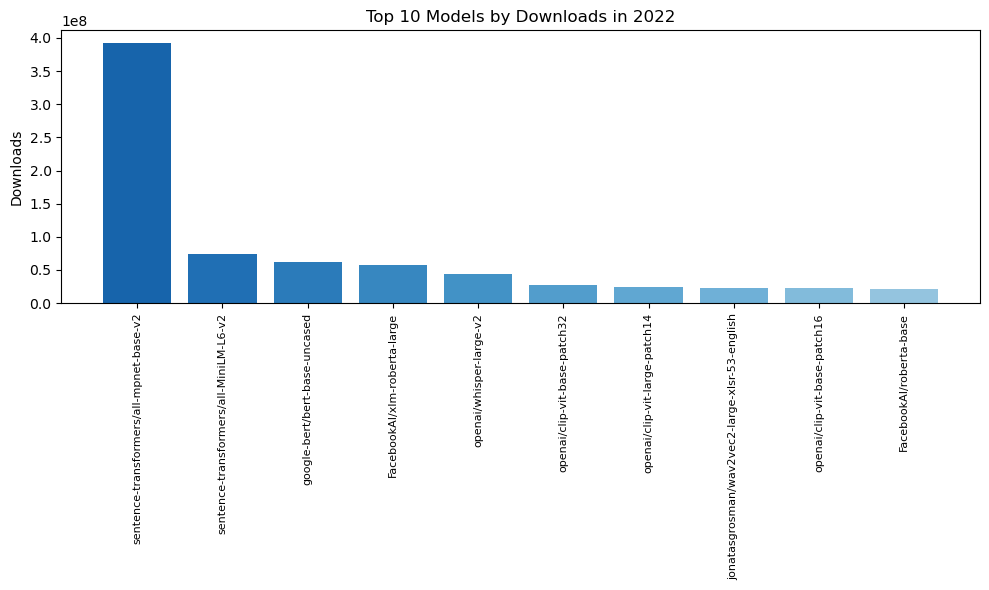

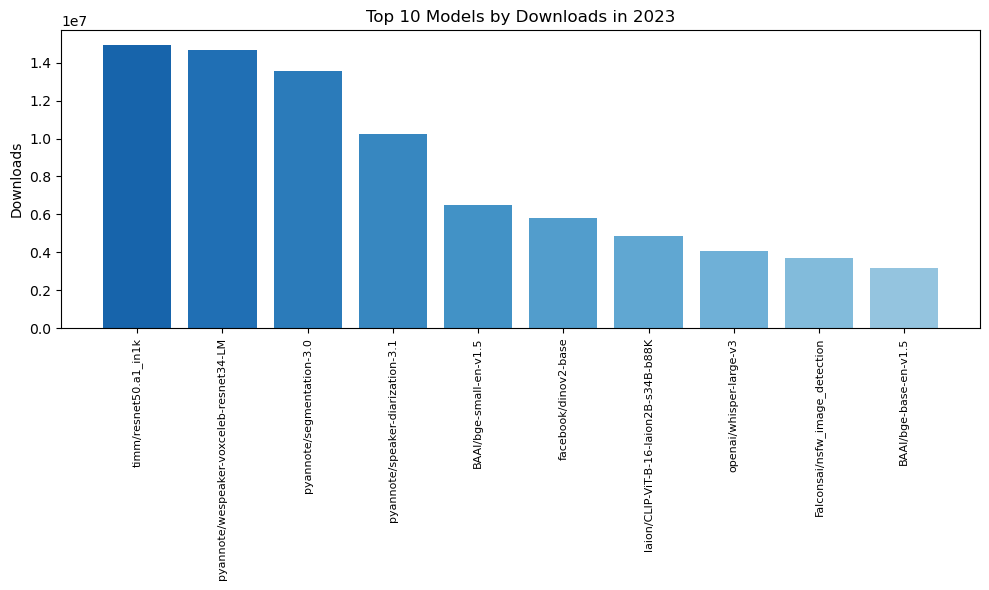

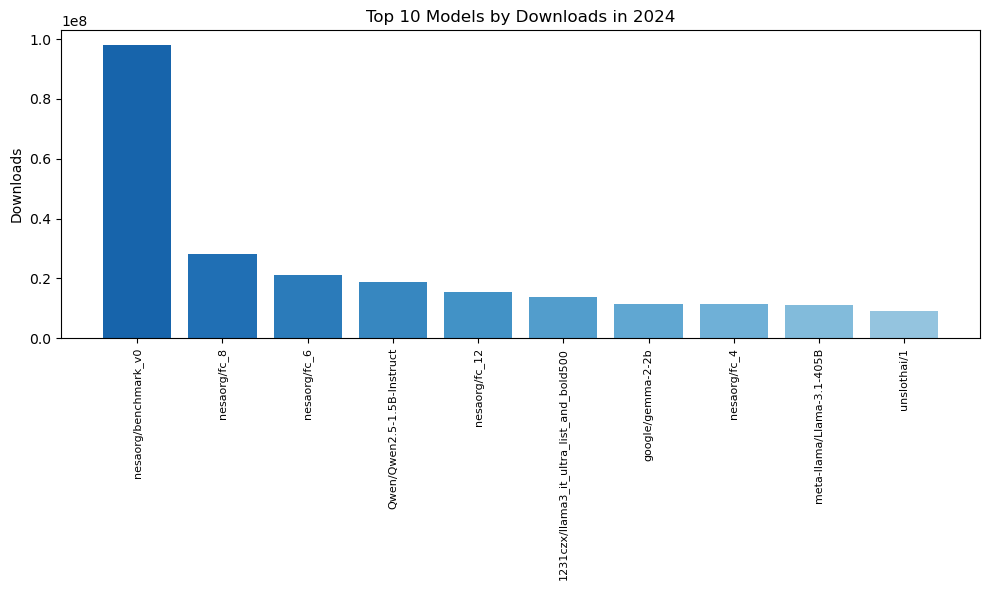

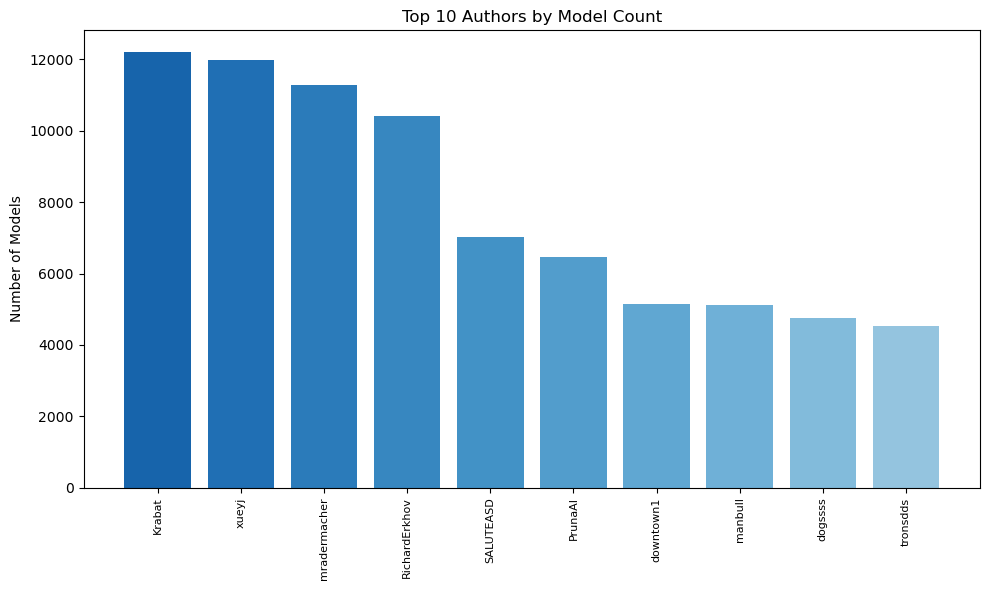

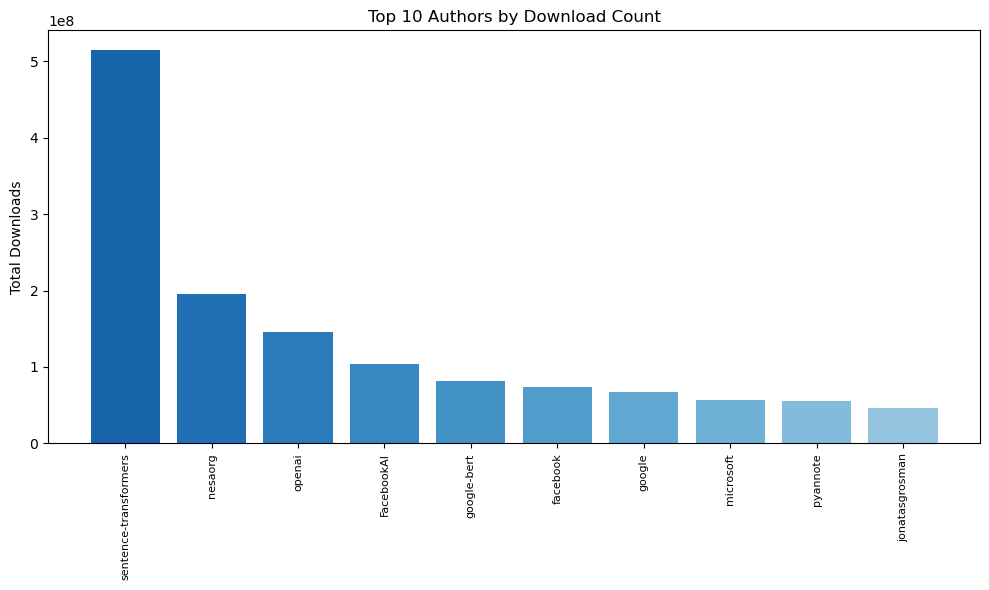

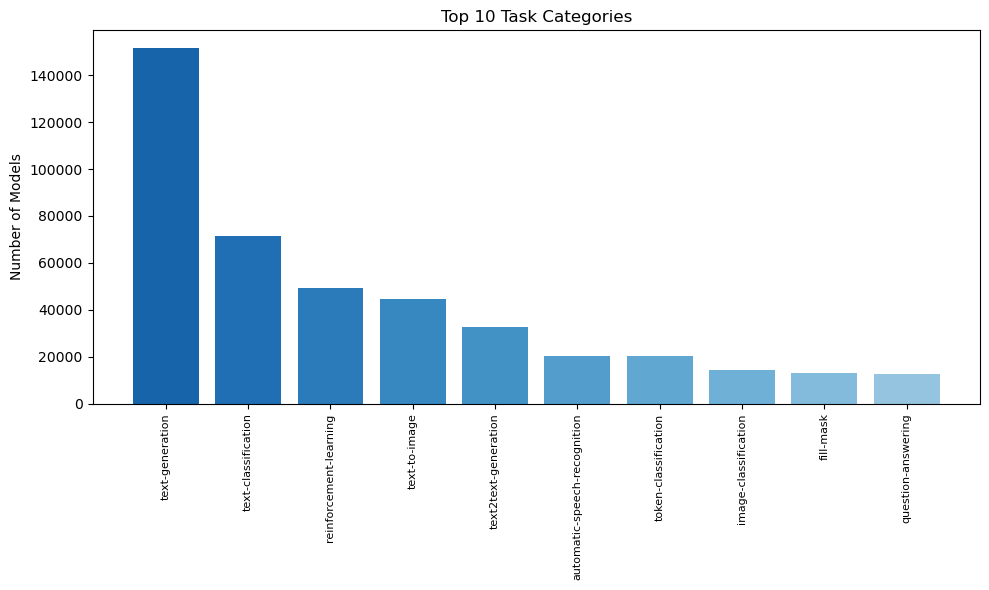

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOP_K = 10

df['year'] = df['createdAt'].dt.year

for year in range(2018, 2025):
    df_year = df[df['year'] == year].sort_values(by='downloads', ascending=False).head(TOP_K)
    if not df_year.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(df_year['modelId'], df_year['downloads'], color=plt.cm.Blues(np.linspace(0.8, 0.4, len(df_year))))
        plt.xticks(rotation=90, fontsize=8)
        plt.title(f"Top {TOP_K} Models by Downloads in {year}")
        plt.ylabel("Downloads")
        plt.tight_layout()
        plt.savefig(f"top_{TOP_K}_models_by_downloads_{year}.png")
        plt.show()
        plt.close()

author_counts = df['author'].value_counts().head(TOP_K)

plt.figure(figsize=(10, 6))
plt.bar(author_counts.index, author_counts.values, color=plt.cm.Blues(np.linspace(0.8, 0.4, len(author_counts))))
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {TOP_K} Authors by Model Count")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.savefig(f"top_{TOP_K}_authors_by_model_count.png")
plt.show()
plt.close()

author_downloads = df.groupby('author')['downloads'].sum().sort_values(ascending=False).head(TOP_K)

plt.figure(figsize=(10, 6))
plt.bar(author_downloads.index, author_downloads.values, color=plt.cm.Blues(np.linspace(0.8, 0.4, len(author_downloads))))
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {TOP_K} Authors by Download Count")
plt.ylabel("Total Downloads")
plt.tight_layout()
plt.savefig(f"top_{TOP_K}_authors_by_download_count.png")
plt.show()
plt.close()

task_category_counts = df['pipeline_tag'].value_counts().head(TOP_K)

plt.figure(figsize=(10, 6))
plt.bar(task_category_counts.index, task_category_counts.values, color=plt.cm.Blues(np.linspace(0.8, 0.4, len(task_category_counts))))
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {TOP_K} Task Categories")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.savefig(f"top_{TOP_K}_task_categories.png")
plt.show()
plt.close()

In [20]:
print(df['card'][0])

---
language: en
license: apache-2.0
library_name: sentence-transformers
tags:
- sentence-transformers
- feature-extraction
- sentence-similarity
- transformers
datasets:
- s2orc
- flax-sentence-embeddings/stackexchange_xml
- ms_marco
- gooaq
- yahoo_answers_topics
- code_search_net
- search_qa
- eli5
- snli
- multi_nli
- wikihow
- natural_questions
- trivia_qa
- embedding-data/sentence-compression
- embedding-data/flickr30k-captions
- embedding-data/altlex
- embedding-data/simple-wiki
- embedding-data/QQP
- embedding-data/SPECTER
- embedding-data/PAQ_pairs
- embedding-data/WikiAnswers
pipeline_tag: sentence-similarity
---


# all-mpnet-base-v2
This is a [sentence-transformers](https://www.SBERT.net) model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

## Usage (Sentence-Transformers)
Using this model becomes easy when you have [sentence-transformers](https://www.SBERT.net) installed:

```
pip insta

In [12]:
# check the structure of the pandas dataframe
df.head(3)

modelId                 author  \
0  sentence-transformers/all-mpnet-base-v2  sentence-transformers   
1                     nesaorg/benchmark_v0                nesaorg   
2   sentence-transformers/all-MiniLM-L6-v2  sentence-transformers   

              last_modified  downloads  likes           library_name  \
0 2024-11-05 15:25:48+00:00  391757489    874  sentence-transformers   
1 2024-08-19 18:24:49+00:00   98012579      1                   None   
2 2024-11-01 10:26:30+00:00   74110727   2526  sentence-transformers   

                                                tags         pipeline_tag  \
0  [sentence-transformers, pytorch, onnx, safeten...  sentence-similarity   
1  [safetensors, model_hub_mixin, pytorch_model_h...                 None   
2  [sentence-transformers, pytorch, tf, rust, onn...  sentence-similarity   

                  createdAt  \
0 2022-03-02 23:29:05+00:00   
1 2024-08-13 21:07:37+00:00   
2 2022-03-02 23:29:05+00:00   

                                                card  year  
0  ---\nlanguage: en\nlicense: apache-2.0\nlibrar...  2022  
1  ---\ntags:\n- model_hub_mixin\n- pytorch_model...  2024  
2  ---\nlanguage: en\nlicense: apache-2.0\nlibrar...  2022

In [28]:
import pandas as pd
import ast

# 假设 'tags' 列是字符串表示的数组，我们需要解析它
df_split_temp['tags_list'] = df_split_temp['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 去除 'arxiv:1910.09700' 标签，检查其他 'arxiv:' 标签
valid_arxiv_count = df_split_temp['tags_list'].apply(
    lambda x: any(tag.lower().startswith('arxiv:') and tag.lower().strip() != 'arxiv:1910.09700' for tag in x)
)

# 计算比例
proportion_with_arxiv = valid_arxiv_count.sum() / len(df_split_temp)
numerator = valid_arxiv_count.sum()
denominator = len(df_split_temp)

# 输出结果
print(f"Proportion of items with arXiv tags (excluding 'arxiv:1910.09700'): {numerator}/{denominator} = {numerator / denominator:.2%}")


Proportion of items with arXiv tags (excluding 'arxiv:1910.09700'): 40839/1108759 = 3.68%


In [27]:
print(df_split_temp[df_split_temp['modelId']=='sentence-transformers/all-mpnet-base-v2']['tags'].values)

[array(['sentence-transformers', 'pytorch', 'onnx', 'safetensors',
        'openvino', 'mpnet', 'fill-mask', 'feature-extraction',
        'sentence-similarity', 'transformers', 'en', 'dataset:s2orc',
        'dataset:flax-sentence-embeddings/stackexchange_xml',
        'dataset:ms_marco', 'dataset:gooaq',
        'dataset:yahoo_answers_topics', 'dataset:code_search_net',
        'dataset:search_qa', 'dataset:eli5', 'dataset:snli',
        'dataset:multi_nli', 'dataset:wikihow',
        'dataset:natural_questions', 'dataset:trivia_qa',
        'dataset:embedding-data/sentence-compression',
        'dataset:embedding-data/flickr30k-captions',
        'dataset:embedding-data/altlex',
        'dataset:embedding-data/simple-wiki', 'dataset:embedding-data/QQP',
        'dataset:embedding-data/SPECTER',
        'dataset:embedding-data/PAQ_pairs',
        'dataset:embedding-data/WikiAnswers', 'arxiv:1904.06472',
        'arxiv:2102.07033', 'arxiv:2104.08727', 'arxiv:1704.05179',
        'arxi

In [78]:
df_split_temp[arxiv_count]['tags_list'].value_counts()

In [29]:
from urllib.parse import urlparse
import pandas as pd
import re

# Valid PDF link domains
VALID_PDF_LINKS = [
    "arxiv.org",
    "biorxiv.org",
    "medrxiv.org",
    "dl.acm.org",
    "dblp.uni-trier.de",
    "scholar.google.com",
    "pubmed.ncbi.nlm.nih.gov",
    "frontiersin.org",
    "mdpi.com",
    "cvpr.thecvf.com",
    "nips.cc",
    "icml.cc",
    "ijcai.org",
    "webofscience.com",
    "journals.plos.org",
    "nature.com",
    "semanticscholar.org",
    "chemrxiv.org",
    "link.springer.com",
    "ieeexplore.ieee.org",
    "aaai.org",
    "openaccess.thecvf.com",
]

def extract_links(text):
    """Extract PDF and GitHub links from the text."""
    if pd.isna(text):
        return {"pdf_link": None, "github_link": None, "all_links": []}
    
    # Find all links (match https://, http://, and www.)
    all_links = [link.strip(".,)") for link in re.findall(r"(https?://\S+|www\.\S+)", text)]
    
    # Function to check if the link is a valid PDF link
    def is_valid_pdf_link(link):
        """
        Check if a link is a valid PDF link:
        1. Matches one of the predefined VALID_PDF_LINKS domains;
        2. Or ends with ".pdf".
        """
        try:
            parsed_url = urlparse(link)
            domain = parsed_url.netloc.lstrip("www.")  # Remove "www." prefix
        except Exception:
            return False  # Invalid link

        # Check if the domain is valid or the link ends with ".pdf"
        return domain in VALID_PDF_LINKS or link.lower().endswith(".pdf")
    
    # Filter PDF and GitHub links
    pdf_links = [link for link in all_links if is_valid_pdf_link(link)]
    github_links = [link for link in all_links if "github.com" in link]
    
    # Return results
    return {
        "pdf_link": pdf_links if pdf_links else None,
        "github_link": github_links if github_links else None,
        "all_links": all_links if all_links else None
    }

# Ensure the 'card_readme' column is filled with an empty string if it's NaN
df_split_temp['combined_text'] = df_split_temp['card_readme'].fillna('')

# Apply the link extraction function
results = df_split_temp['combined_text'].apply(extract_links)

# Extract the results into separate columns
df_split_temp['pdf_link'] = results.apply(lambda x: x["pdf_link"] if x["pdf_link"] else None)
df_split_temp['github_link'] = results.apply(lambda x: x["github_link"] if x["github_link"] else None)
df_split_temp['all_links'] = results.apply(lambda x: ', '.join(x["all_links"]) if x["all_links"] else None)

# Check if each link type column has a non-empty value (avoids empty strings, lists, or NaNs)
df_split_temp['all_links_non_empty'] = df_split_temp['all_links'].apply(lambda x: bool(x) and x != '[]' and x != '')
df_split_temp['pdf_link_non_empty'] = df_split_temp['pdf_link'].apply(lambda x: bool(x) and x != '[]' and x != '')
df_split_temp['github_link_non_empty'] = df_split_temp['github_link'].apply(lambda x: bool(x) and x != '[]' and x != '')

# Count the occurrences and calculate the ratios
pdf_link_count = df_split_temp['pdf_link_non_empty'].sum()
total_count = len(df_split_temp)
pdf_link_ratio = (pdf_link_count / total_count) * 100

# Count rows where 'all_links' is non-empty
all_link_count = df_split_temp['all_links_non_empty'].sum()
all_link_ratio = (all_link_count / total_count) * 100

github_link_count = df_split_temp['github_link_non_empty'].sum()
github_link_ratio = (github_link_count / total_count) * 100

# Count entries with no PDF but with GitHub links
no_pdf_has_github_count = df_split_temp[~df_split_temp['pdf_link_non_empty'] & df_split_temp['github_link_non_empty']].shape[0]
no_pdf_has_github_ratio = (no_pdf_has_github_count / total_count) * 100

# Output the results
print(f"Model cards with all links: {all_link_count}/{total_count} = {all_link_ratio:.2f}%")
print(f"Model cards with GitHub links: {github_link_count}/{total_count} = {github_link_ratio:.2f}%")
print(f"Model cards with PDF links: {pdf_link_count}/{total_count} = {pdf_link_ratio:.2f}%")
print(f"Model cards with NO PDF but HAS GitHub links: "
      f"{no_pdf_has_github_count}/{total_count} = {no_pdf_has_github_ratio:.2f}%")


KeyboardInterrupt: 

In [31]:
from urllib.parse import urlparse
import pandas as pd
import re

# Valid PDF link domains
VALID_PDF_LINKS = [
    "arxiv.org",
    "biorxiv.org",
    "medrxiv.org",
    "dl.acm.org",
    "dblp.uni-trier.de",
    "scholar.google.com",
    "pubmed.ncbi.nlm.nih.gov",
    "frontiersin.org",
    "mdpi.com",
    "cvpr.thecvf.com",
    "nips.cc",
    "icml.cc",
    "ijcai.org",
    "webofscience.com",
    "journals.plos.org",
    "nature.com",
    "semanticscholar.org",
    "chemrxiv.org",
    "link.springer.com",
    "ieeexplore.ieee.org",
    "aaai.org",
    "openaccess.thecvf.com",
]

# Function to extract links from text
def extract_links(text):
    """Extract PDF and GitHub links from the text."""
    if pd.isna(text):
        return {"pdf_link": None, "github_link": None, "all_links": []}
    
    # Find all links (match https://, http://, and www.)
    all_links = [link.strip(".,)") for link in re.findall(r"(https?://\S+|www\.\S+)", text)]
    
    # Function to check if the link is a valid PDF link, excluding specific ones
    def is_valid_pdf_link(link):
        """
        Check if a link is a valid PDF link:
        1. Matches one of the predefined VALID_PDF_LINKS domains;
        2. Ends with ".pdf";
        3. Allows 'arxiv:1910.09700' but still requires other valid PDF links.
        """
        try:
            parsed_url = urlparse(link)
            domain = parsed_url.netloc.lstrip("www.")  # Remove "www." prefix
        except Exception:
            return False  # Invalid link

        # If the link is 'arxiv:1910.09700', allow it but still need another valid link
        return (domain in VALID_PDF_LINKS or link.lower().endswith(".pdf"))

    # Filter PDF and GitHub links
    pdf_links = [link for link in all_links if is_valid_pdf_link(link)]
    github_links = [link for link in all_links if "github.com" in link]
    
    # If 'arxiv:1910.09700' is found, ensure there are other valid PDF links
    has_arxiv_1910 = any("arxiv:1910.09700" in link for link in all_links)
    if has_arxiv_1910 and len(pdf_links) == 1 and "arxiv:1910.09700" in pdf_links:
        pdf_links = []  # Exclude arxiv:1910.09700 if no other valid link exists
    
    # Return results
    return {
        "pdf_link": pdf_links if pdf_links else None,
        "github_link": github_links if github_links else None,
        "all_links": all_links if all_links else None
    }

# Ensure the 'card_readme' column is filled with an empty string if it's NaN
df_split_temp['combined_text'] = df_split_temp['card_readme'].fillna('')

# Apply the link extraction function
results = df_split_temp['combined_text'].apply(extract_links)

# Extract the results into separate columns
df_split_temp['pdf_link'] = results.apply(lambda x: x["pdf_link"] if x["pdf_link"] else None)
df_split_temp['github_link'] = results.apply(lambda x: x["github_link"] if x["github_link"] else None)
df_split_temp['all_links'] = results.apply(lambda x: ', '.join(x["all_links"]) if x["all_links"] else None)

# Check if each link type column has a non-empty value (avoids empty strings, lists, or NaNs)
df_split_temp['all_links_non_empty'] = df_split_temp['all_links'].apply(lambda x: bool(x) and x != '[]' and x != '')
df_split_temp['pdf_link_non_empty'] = df_split_temp['pdf_link'].apply(lambda x: bool(x) and x != '[]' and x != '')
df_split_temp['github_link_non_empty'] = df_split_temp['github_link'].apply(lambda x: bool(x) and x != '[]' and x != '')

# Count the occurrences and calculate the ratios
pdf_link_count = df_split_temp['pdf_link_non_empty'].sum()
total_count = len(df_split_temp)
pdf_link_ratio = (pdf_link_count / total_count) * 100

# Count rows where 'all_links' is non-empty
all_link_count = df_split_temp['all_links_non_empty'].sum()
all_link_ratio = (all_link_count / total_count) * 100

github_link_count = df_split_temp['github_link_non_empty'].sum()
github_link_ratio = (github_link_count / total_count) * 100

# Count entries with no PDF but with GitHub links
no_pdf_has_github_count = df_split_temp[~df_split_temp['pdf_link_non_empty'] & df_split_temp['github_link_non_empty']].shape[0]
no_pdf_has_github_ratio = (no_pdf_has_github_count / total_count) * 100

# Output the results
print(f"Model cards with all links: {all_link_count}/{total_count} = {all_link_ratio:.2f}%")
print(f"Model cards with GitHub links: {github_link_count}/{total_count} = {github_link_ratio:.2f}%")
print(f"Model cards with PDF links: {pdf_link_count}/{total_count} = {pdf_link_ratio:.2f}%")
print(f"Model cards with NO PDF but HAS GitHub links: "
      f"{no_pdf_has_github_count}/{total_count} = {no_pdf_has_github_ratio:.2f}%")


Model cards with all links: 580229/1108759 = 52.33%
Model cards with GitHub links: 194586/1108759 = 17.55%
Model cards with PDF links: 226015/1108759 = 20.38%
Model cards with NO PDF but HAS GitHub links: 158688/1108759 = 14.31%


In [32]:
# check pdf link
# 如果 pdf_link 是列表，逐个展开
df_split_temp['pdf_link_flat'] = df_split_temp['pdf_link'].apply(
    lambda x: x if isinstance(x, list) else [x] if pd.notna(x) else []
)

# 展开 pdf_link 列（每个链接变成一行）
df_split_temp_exploded = df_split_temp.explode('pdf_link_flat')

# 统计每个链接的出现次数
link_counts = df_split_temp_exploded['pdf_link_flat'].value_counts()

# 输出链接频率统计
print(link_counts)


https://arxiv.org/abs/1910.09700     187744
https://arxiv.org/abs/2209.11055}      2083
https://arxiv.org/abs/1908.10084"      1246
https://arxiv.org/abs/2306.01708       1227
https://arxiv.org/abs/2305.13516       1176
                                      ...  
https://arxiv.org/abs/2306.03809'         1
https://arxiv.org/pdf/2309.05196          1
https://arxiv.org/pdf/2308.14752          1
https://arxiv.org/pdf/2305.13873          1
https://arxiv.org/pdf/2411.02355          1
Name: pdf_link_flat, Length: 7723, dtype: int64


In [14]:
from urllib.parse import urlparse

# 提取 PDF 链接的域名前缀
def extract_domain(link):
    """
    从链接中提取域名部分。
    """
    if pd.isna(link) or not isinstance(link, str):
        return None
    parsed_url = urlparse(link)
    domain = parsed_url.netloc  # 获取域名部分
    return domain if domain else None

# 1. 如果 pdf_link 是列表，逐个提取域名
df_split_temp['pdf_link_domains'] = df_split_temp['pdf_link'].apply(
    lambda x: [extract_domain(link) for link in x] if isinstance(x, list) else None
)

# 2. 将域名列表展开（explode），便于统计频率
df_split_temp_exploded = df_split_temp.explode('pdf_link_domains')

# 3. 统计域名前缀的使用频率
domain_counts = df_split_temp_exploded['pdf_link_domains'].value_counts()

# 输出域名频率统计
print(domain_counts)


arxiv.org                      258260
www.arxiv.org                    2322
dl.acm.org                       1117
aclanthology.org                  937
scholar.google.com                706
                                ...  
stable-fast-3d.github.io            1
lexfridman.com                      1
www.jarrar.info                     1
jasonppy.github.io                  1
s3.eu-north-1.amazonaws.com         1
Name: pdf_link_domains, Length: 277, dtype: int64


In [11]:
#print(df_split_temp[df_split_temp['pdf_link_non_empty']][['modelId', 'card_readme', 'pdf_link']].iloc[0]['card_readme'])
print(df_split_temp[df_split_temp['pdf_link_non_empty']][['modelId', 'pdf_link']])

                                         modelId  \
0        sentence-transformers/all-mpnet-base-v2   
2         sentence-transformers/all-MiniLM-L6-v2   
14                             facebook/opt-1.3b   
31        princeton-nlp/sup-simcse-roberta-large   
42       sentence-transformers/all-MiniLM-L12-v2   
...                                          ...   
1086718           OPPOer/MultilingualSD3-adapter   
1098376                       youngzhou12/GLoRIA   
1103724           LogeshLogesh/all-MiniLM-L12-v2   
1105662                   Zeus313/Inspiring.ZEUS   
1106455                 lordofthejars/toxic-bert   

                                                  pdf_link  
0                   [https://arxiv.org/pdf/2104.08727.pdf]  
2                   [https://arxiv.org/pdf/2104.08727.pdf]  
14                  [https://arxiv.org/pdf/2205.01068.pdf]  
31       [https://arxiv.org/pdf/2104.08821.pdf, https:/...  
42                  [https://arxiv.org/pdf/2104.08727.pdf]  
...      

'finetuned' tag count: 3731
'adapter' tag count: 152491


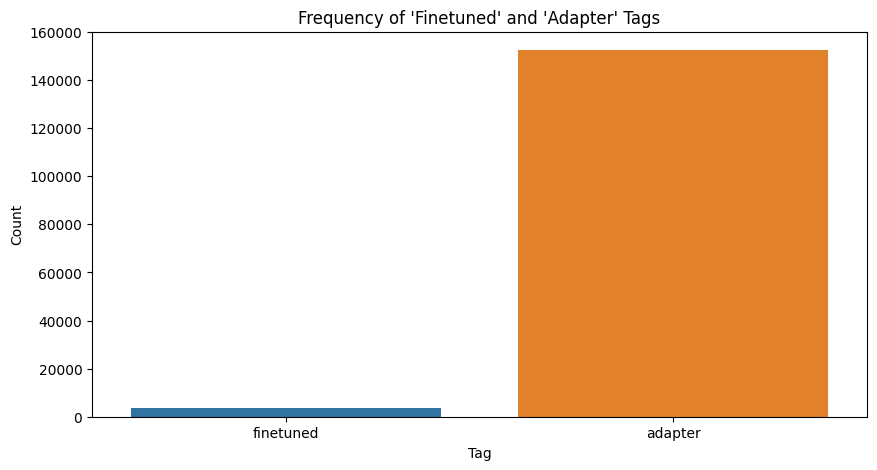


Items containing 'finetuned' tag:
                                                   modelId  \
232                 TheBloke/Mistral-7B-Instruct-v0.1-GPTQ   
234      MattyB95/AST-VoxCelebSpoof-Synthetic-Voice-Det...   
234      MattyB95/AST-VoxCelebSpoof-Synthetic-Voice-Det...   
242                     mistralai/Mistral-7B-Instruct-v0.2   
457                 TheBloke/Mistral-7B-Instruct-v0.2-GPTQ   
...                                                    ...   
1105564            mradermacher/Ninja-v1-NSFW-128k-i1-GGUF   
1107774  featherless-ai-quants/LobnaSellami7-SC_16bit_m...   
1107774  featherless-ai-quants/LobnaSellami7-SC_16bit_m...   
1107857                  mradermacher/KAI-7B-Instruct-GGUF   
1108215                           tensorblock/iris-7b-GGUF   

                        author             last_modified  downloads  likes  \
232                   TheBloke 2023-09-29 20:48:48+00:00    1133617     77   
234                   MattyB95 2024-01-31 15:54:22+00:00    1091

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Expand the 'tags' column so that each tag is in its own row
df_exploded = df_split_temp.explode('tags')

# Count the occurrences of 'finetuned' and 'adapter' tags
finetuned_count = df_exploded[df_exploded['tags'].str.contains('finetuned', case=False, na=False)].shape[0]
adapter_count = df_exploded[df_exploded['tags'].str.contains('adapter', case=False, na=False)].shape[0]

# Output the counts of the tags
print(f"'finetuned' tag count: {finetuned_count}")
print(f"'adapter' tag count: {adapter_count}")

# Now, let's print out the rows that contain these tags
finetuned_items = df_exploded[df_exploded['tags'].str.contains('finetuned', case=False, na=False)]
adapter_items = df_exploded[df_exploded['tags'].str.contains('adapter', case=False, na=False)]

# Print the rows that contain 'finetuned' or 'adapter'
print("\nItems containing 'finetuned' tag:")
print(finetuned_items)

print("\nItems containing 'adapter' tag:")
print(adapter_items)


In [28]:
key = 'pdf_link'
df_exploded = df.explode(key)
df_exploded[key] = df_exploded[key].str.extract(r'(https?://[^/]+)')
prefix_counts = df_exploded[key].value_counts()
print(prefix_counts)


https://arxiv.org                  257301
https://www.arxiv.org                2322
https://dl.acm.org                   1118
http://arxiv.org                     1091
https://scholar.google.com            706
https://link.springer.com             252
https://ieeexplore.ieee.org           202
https://openaccess.thecvf.com         201
https://pubmed.ncbi.nlm.nih.gov        75
http://openaccess.thecvf.com            9
https://icml.cc                         8
https://journals.plos.org               8
https://aaai.org                        6
https://www.aaai.org                    4
https://chemrxiv.org                    3
http://aaai.org                         1
https://www.icml.cc                     1
Name: pdf_link, dtype: int64


In [14]:
missing_in_pdf = df[df['tags_list'].apply(lambda x: any('arxiv:' in tag for tag in x)) & df['pdf_link'].isna()]
missing_in_pdf[['tags', 'combined_text', 'pdf_link', 'github_link', 'all_links']]

KeyError: 'tags_list'

In [9]:
# check all value_counts, see if there exist weird value

In [ ]:
"""def normalize_text(text: str) -> str:
    """
    归一化文本，去除所有非字母数字字符并转小写。
    """
    return re.sub(r"[^a-zA-Z0-9]+", "", text.strip().lower())


def check_license_only(
    card_text: str,
    max_length: int = 400,
    allowed_licenses: list = None,
    license_templates: list = None
) -> bool:
    """
    判断当前卡片是否仅仅包含「合法 license」信息（无其它文本）。
    
    :param card_text: 原始卡片文本
    :param max_length: 允许的最大文本长度, 如果超过则说明不只是license
    :param allowed_licenses: 允许出现的license列表
    :param license_templates: 匹配license的正则模板列表
    :return: True / False
    """
    if allowed_licenses is None:
        allowed_licenses = ALLOW_LICENSES
    
    if license_templates is None:
        license_templates = LICENSE_TEMPLATES
    
    # 去除 \r 统一风格
    txt_stripped = card_text.replace("\r", "").strip()
    
    # 如果文本长度就已经超过我们定义的 max_length，基本就不是「license-only」了
    if len(txt_stripped) > max_length:
        return False
    
    # 逐条匹配
    for pattern in license_templates:
        match = re.match(pattern, txt_stripped, flags=re.IGNORECASE)
        if match:
            # 如果正则匹配成功，提取license值
            license_value = match.group(1).lower()
            if license_value in allowed_licenses:
                return True
    return False


def check_contains_default_template(
    card_text: str,
    default_template: str,
    fuzzy_threshold = None
) -> bool:
    """
    判断卡片文本是否包含默认模板内容。
    
    - 若未指定 fuzzy_threshold，则采用 "子串匹配" 方式（严格匹配）。
    - 若指定 fuzzy_threshold (0~1之间)，则可做一定程度的模糊匹配/相似度（这里仅给出思路，需自行实现相似度比较）。
    
    :param card_text: 原始卡片文本
    :param default_template: 默认模板的大段文本
    :param fuzzy_threshold: None 表示子串匹配；非 None 表示做相似度匹配
    :return: True / False
    """
    # 简单 normalize
    normalized_card = normalize_text(card_text)
    normalized_template = normalize_text(default_template)
    
    if fuzzy_threshold is None:
        # 子串匹配
        return normalized_template in normalized_card
    else:
        # 这里只是示例，你可以改用编辑距离或向量相似度
        # below is a trivial example of ratio = len_of_overlap / len_template
        overlap_length = 0
        # 简单地 linear-scan 对 template 中的 token 做计数
        # [这里你可以改用更专业的 fuzzy / difflib / rapidfuzz 库来做相似度处理]
        for i in range(len(normalized_template)):
            if i < len(normalized_card) and normalized_template[i] == normalized_card[i]:
                overlap_length += 1
            else:
                break
        ratio = float(overlap_length) / float(len(normalized_template))
        return (ratio >= fuzzy_threshold)


def count_more_information_needed(card_text: str) -> int:
    """
    统计 `[More Information Needed]` 或者类似格式出现的次数。
    """
    pattern = re.compile(r"\[More Information Needed\]", re.IGNORECASE)
    matches = pattern.findall(card_text)
    return len(matches)


def check_diff_ratio(card_text: str, reference_text: str) -> float:
    """
    示例：计算与参考文本的差异比率(diff ratio)。
    这里仅展示用 Python 的 difflib 来做一个简单文本 diff，相似度越高 => 差异度越低。
    
    :return: diff_ratio, 0~1, 越大表示差异越大。
    """
    import difflib
    
    card_lines = card_text.splitlines(keepends=False)
    ref_lines = reference_text.splitlines(keepends=False)
    differ = difflib.Differ()
    diff_result = list(differ.compare(ref_lines, card_lines))
    
    # 统计有哪些行是 + / - / ?
    # difflib 只是个演示，也可换成别的方法
    changed_lines = sum(
        1 for line in diff_result if line.startswith("+ ") or line.startswith("- ")
    )
    total_lines = max(len(ref_lines), len(card_lines))
    if total_lines == 0:
        return 0.0
    
    return float(changed_lines) / float(total_lines)


# ========== 主函数：判断是否为「default card」 ==========

def is_default_card(
    card_text: str,
    # == 基础条件 ==
    check_license: bool = True,        # 是否启用「license-only」判断
    check_template: bool = True,       # 是否启用「包含默认模板」判断
    
    # == 可选增强条件 ==
    max_license_len: int = 400,        # 仅license时的长度限制
    min_diff_ratio = None,  # 如果指定了，就基于 diff ratio 做进一步判断
    diff_reference_text: str = CONTAIN_DEFAULT_PATTERNS,  # diff 的对照模板
    
    # 如果想基于 "More Information Needed" 出现次数来辅助判断
    use_moreinfo_count: bool = False,
    moreinfo_count_threshold: int = 10,
    
    # 如果想基于卡片字数(字符数)来辅助判断
    max_card_length = None,
    
) -> bool:
    """
    返回 True 表示此 card_text 被认为是「default card」。
    """
    # (A) 如果只检测 license-only
    if check_license and check_license_only(
        card_text, max_length=max_license_len, allowed_licenses=ALLOW_LICENSES
    ):
        return True
    
    # (B) 如果需要检查是否「包含默认模板」（子串或模糊匹配都行）
    if check_template:
        # 这里先用严格子串匹配，如需模糊，可以在前面函数加参数 fuzzy_threshold=0.8
        if check_contains_default_template(card_text, CONTAIN_DEFAULT_PATTERNS, fuzzy_threshold=None):
            return True
    
    # ========== 以下是一系列可选条件，可根据需求灵活加 or 改成 and 关系 ==========

    # (C) diff ratio，如果指定了 min_diff_ratio，就对默认模板做 diff
    if min_diff_ratio is not None:
        ratio = check_diff_ratio(card_text, diff_reference_text)
        # diff_ratio 越大 => 差异越大，如果差异小于 X => 可以认为是大部分一样
        # 这里演示：当差异率 < 0.05 => 认为是默认卡
        if ratio < min_diff_ratio:
            return True

    # (D) `[More Information Needed]` 出现次数过多 => 可能是默认模板
    # 这里我们以「超过阈值」就认为是 default
    if use_moreinfo_count:
        cnt = count_more_information_needed(card_text)
        if cnt > moreinfo_count_threshold:
            return True

    # (E) 如果想要基于卡片总长度 <= X 也可能是 default
    if max_card_length is not None:
        # 这里也可以做一个非常低的字数判断
        # 例如：卡片文本长度 < 800 => 可能是基本没改动
        if len(card_text) <= max_card_length:
            return True

    # 如果没有任何条件触发 => 认为不是 default
    return False


# ======================= DEMO 测试 =======================

if __name__ == "__main__":
    # 示例：
    test_card_license_only = "---\nlicense: mit\n---\n"
    test_card_default_template = CONTAIN_DEFAULT_PATTERNS  # 直接就是大段文档
    test_card_custom = "This is a fully custom card with new content."

    print(
        "License-only =>",
        is_default_card(
            test_card_license_only,
            check_license=True,
            check_template=False,  # 只测试license
        )
    )

    print(
        "Default template =>",
        is_default_card(
            test_card_default_template,
            check_license=False,
            check_template=True
        )
    )

    print(
        "Custom =>",
        is_default_card(
            test_card_custom,
            check_license=True,
            check_template=True
        )
    )

    # 如果想测试 diff-based approach + [More Information Needed] 次数
    custom_card_with_some_mincnt = "I changed a bit of text. [More Information Needed]\n" * 15
    print(
        "Custom w/ 15 times '[More Information Needed]' =>",
        is_default_card(
            custom_card_with_some_mincnt,
            check_license=True,
            check_template=True,
            use_moreinfo_count=True,
            moreinfo_count_threshold=10  # 大于10就认为是default
        )
    )

    # 测试 diff ratio
    slightly_modified = CONTAIN_DEFAULT_PATTERNS.replace("## Model Details", "## My Personal Model").replace("More Information Needed", "ABC")
    # 仅少数行改动 => diff ratio 应该较小
    print(
        "Slightly modified =>",
        is_default_card(
            slightly_modified,
            check_license=False,
            check_template=False,   # 不用上面“模板子串匹配”
            min_diff_ratio=0.05     # 如果差异率 < 5%就认为是default
        )
    )"""

In [72]:
print(df[df['is_default_card']]['card'].value_counts())

---\nlicense: openrail\n---\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [73]:
df[~df['is_default_card']]['card'].value_counts().head(20)

Entry not found                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [74]:
print(df[~df['is_default_card']]['card'].value_counts().index[1])

---
library_name: transformers
tags: []
---

# Model Card for Model ID

<!-- Provide a quick summary of what the model is/does. -->



## Model Details

### Model Description

<!-- Provide a longer summary of what this model is. -->

This is the model card of a 🤗 transformers model that has been pushed on the Hub. This model card has been automatically generated.

- **Developed by:** [More Information Needed]
- **Funded by [optional]:** [More Information Needed]
- **Shared by [optional]:** [More Information Needed]
- **Model type:** [More Information Needed]
- **Language(s) (NLP):** [More Information Needed]
- **License:** [More Information Needed]
- **Finetuned from model [optional]:** [More Information Needed]

### Model Sources [optional]

<!-- Provide the basic links for the model. -->

- **Repository:** [More Information Needed]
- **Paper [optional]:** [More Information Needed]
- **Demo [optional]:** [More Information Needed]

## Uses

<!-- Address questions around how the model i

In [78]:
# filtering rules
df['card'].value_counts()

Entry not found                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [84]:
# other special case, 
df_filtered = df[
    (df['card'].str.len() < 50) & 
    (~df['card'].str.contains('license', case=False, na=False)) &
    (~df['card'].str.contains('library_name', case=False, na=False))
]
df_filtered['card'].value_counts()


Entry not found                                 359571
Heban olla vogola\n\n                              442
---\n{}\n---\n                                     124
---\ntags:\n- conversational\n---                  106
---\nlanguage:\n- en\n---                          101
                                                 ...  
AI hub의 경상도 방언 발화 데이터의 라벨을 사용하였습니다.                  1
---\nbase_model:\n- apple/DepthPro\n---              1
My First Model\n- for classification of wolf         1
This is the model so far before time out\n           1
trail2                                               1
Name: card, Length: 2706, dtype: int64

In [91]:
df_filtered = df[
    (df['card'] == 'Entry not found') & 
    df['tags'].apply(lambda x: 'arxiv' in x)
]
df_filtered

Empty DataFrame
Columns: [modelId, author, last_modified, downloads, likes, library_name, tags, pipeline_tag, createdAt, card, year, tags_list, is_default_card]
Index: []

In [93]:
df_filtered = df[
    (df['card'] == 'Entry not found')]
df_filtered['tags'].value_counts()